# Definitions 

## Graduates
“Recent” graduates are those under age 28 (roughly within five years of graduation on a normal schedule). This includes those with graduate degrees.

## Earnings
Earnings figures are based on people employed full-time (35 hours or more), year-round (50 weeks or more) with positive earnings; except where noted, earnings also exclude those who are in school or who have graduate degrees. I used raw earnings figures, not adjusted for inflation, in order to keep the number round (given low levels of inflation in recent years, it makes minimal difference).

## Sample Size
The sample size corresponds to the sample used to compute earnings figures.

## FOD1P
Field of Degree

## ESR: Employement Status Recode
0. (b) N/A (less than 16 years old)
1. (1) Civilian employed, at work
2. (2) Civilian employed, with a job but not at work
3. (3) Unemployed
4. (4) Armed forces, at work
5. (5) Armed forces, with a job but not at work
6. (6) Not in labor force

## WKW: Weeks worked during past 12 months
0. (b) N/A (less than 16 years old/did not work during the past 12 months)
1. (1) 50 to 52 weeks worked during past 12 months
2. (2) 48 to 49 weeks worked during past 12 months
3. (3) 40 to 47 weeks worked during past 12 months
4. (4) 27 to 39 weeks worked during past 12 months
5. (5) 14 to 26 weeks worked during past 12 months
6. (6) less than 14 weeks worked during past 12 months

## WKHP: Usual hours worked per week past 12 months
0. (bb) N/A (less than 16 years old/did not work during the past 12 months)
1. (01..98) 1 to 98 usual hours
2. (99) 99 or more usual hours

## OCCP : Occupation Code / Low-wage jobs
- 4020 COOKS
- 4030 FOOD PREPARATION WORKERS
- 4040 BARTENDERS
- 4050 COMBINED FOOD PREPARATION AND SERVING WORKERS, INCLUDING FAST FOOD
- 4060 COUNTER ATTENDANTS, CAFETERIA, FOOD CONCESSION, AND COFFEE SHOP
- 4110 WAITERS AND WAITRESSES
- 4120 FOOD SERVERS, NONRESTAURANT
- 4130 MISCELLANEOUS FOOD PREPARATION AND SERVING RELATED WORKERS, INCLUDING DINING ROOM AND CAFETERIA ATTENDANTS AND BARTENDER HELPERS
- 4140 DISHWASHERS
- 4150 HOSTS AND HOSTESSES, RESTAURANT, LOUNGE, AND COFFEE SHOP
- 4220 JANITORS AND BUILDING CLEANERS
- 4230 MAIDS AND HOUSEKEEPING CLEANERS
- 4240 PEST CONTROL WORKERS
- 4250 GROUNDS MAINTENANCE WORKERS
- 4720 CASHIERS
- 4740 COUNTER AND RENTAL CLERKS
- 4750 PARTS SALESPERSONS
- 4760 RETAIL SALESPERSONS
- 4940 TELEMARKETERS

## OCCP : Occupation Code /College-level jobs
This creates a dummy for college-level jobs. Based off non-public data from Jaison R. Abel and Richard Deitz of the New York Fed. As a result, csv is not included here.
```R
collegejobs <- read.csv("collegejobs.csv",header=TRUE,stringsAsFactors=FALSE)
young$collegejob[young$OCCP10 %in% as.list(collegejobs$OCC[collegejobs$College==1]) | 
                   young$OCCP12 %in% as.list(collegejobs$OCC[collegejobs$College==1])]  <- 1
young$noncollege[young$OCCP10 %in% as.list(collegejobs$OCC[collegejobs$College==0]) | 
                   young$OCCP12 %in% as.list(collegejobs$OCC[collegejobs$College==0])]  <- 1
```

# Preliminary steps

## Imports

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import statsmodels.api as sm
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
# sns.set_theme()
pd.options.display.float_format = '{:,.2f}'.format
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize": (11.7, 8.27)})

SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIGGER_SIZE = 17

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Columns variables and translations

**Rank** :  Rank by median earnings

**Major_code** :  Major code, FO1DP in ACS PUMS

**Major** :  Major description

**Major_category** :  Category of major from Carnevale et al

**Total** :  Total number of people with major

**Sample_size** :  Sample size (unweighted) of full-time, year-round ONLY (used for earnings)

**Men** :  Male graduates

**Women** :  Female graduates

**ShareWomen** :  Women as share of total

**Employed** :  Number employed (ESR == 1 or 2)

**Full_time** :  Employed 35 hours or more

**Part_time** :  Employed less than 35 hours

**Full_time_year_round** :  Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)

**Unemployed** :  Number unemployed (ESR == 3)

**Unemployment_rate** :  Unemployed / (Unemployed + Employed)

**Median** :  Median earnings of full-time, year-round workers

**P25th** :  25th percentile of earnings

**P75th** :  75th percentile of earnings

**College_jobs** :  Number with job requiring a college degree

**Non_college_jobs** :  Number with job not requiring a college degree

**Low_wage_jobs** :  Number in low-wage service jobs

In [3]:
RANK = "Rank"  # Rank by median earnings
MAJOR_CODE = "Major_code"  # Major code, FO1DP in ACS PUMS
MAJOR = "Major"  # Major description
MAJOR_CATEGORY = "Major_category"  # Category of major from Carnevale et al
TOTAL = "Total"  # Total number of people with major
SAMPLE_SIZE = "Sample_size"  # Sample size (unweighted) of full-time, year-round ONLY (used for earnings)
MEN = "Men"  # Male graduates
WOMEN = "Women"  # Female graduates
SHAREWOMEN = "ShareWomen"  # Women as share of total
EMPLOYED = "Employed"  # Number employed (ESR == 1 or 2)
FULL_TIME = "Full_time"  # Employed 35 hours or more
PART_TIME = "Part_time"  # Employed less than 35 hours
FULL_TIME_YEAR_ROUND = "Full_time_year_round"  # Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35) (weighted sample_size)
UNEMPLOYED = "Unemployed"  # Number unemployed (ESR == 3)
UNEMPLOYMENT_RATE = "Unemployment_rate"  # Unemployed / (Unemployed + Employed)
MEDIAN = "Median"  # Median earnings of full-time, year-round workers
P25TH = "P25th"  # 25th percentile of earnings
P75TH = "P75th"  # 75th percentile of earnings
COLLEGE_JOBS = "College_jobs"  # Number with job requiring a college degree
NON_COLLEGE_JOBS = "Non_college_jobs"  # Number with job not requiring a college degree
LOW_WAGE_JOBS = "Low_wage_jobs"  # Number in low-wage service jobs

## Read the dataset

In [4]:
df = pd.read_csv(
    "recent-grads.csv",
    dtype={
        RANK: "int64",
        MAJOR_CODE: "int64",
        MAJOR: "string",
        TOTAL: "float64",
        MEN: "float64",
        WOMEN: "float64",
        MAJOR_CATEGORY: "string",
        SHAREWOMEN: "float64",
        SAMPLE_SIZE: "int64",
        EMPLOYED: "int64",
        FULL_TIME: "int64",
        PART_TIME: "int64",
        FULL_TIME_YEAR_ROUND: "int64",
        UNEMPLOYED: "int64",
        UNEMPLOYMENT_RATE: "float64",
        MEDIAN: "float64",
        P25TH: "float64",
        P75TH: "float64",
        COLLEGE_JOBS: "int64",
        NON_COLLEGE_JOBS: "int64",
        LOW_WAGE_JOBS: "int64",
    },
)

In [5]:
df.head()

Rank  Major_code                                      Major     Total  \
0     1        2419                      PETROLEUM ENGINEERING  2,339.00   
1     2        2416             MINING AND MINERAL ENGINEERING    756.00   
2     3        2415                  METALLURGICAL ENGINEERING    856.00   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING  1,258.00   
4     5        2405                       CHEMICAL ENGINEERING 32,260.00   

        Men     Women Major_category  ShareWomen  Sample_size  Employed  ...  \
0  2,057.00    282.00    Engineering        0.12           36      1976  ...   
1    679.00     77.00    Engineering        0.10            7       640  ...   
2    725.00    131.00    Engineering        0.15            3       648  ...   
3  1,123.00    135.00    Engineering        0.11           16       758  ...   
4 21,239.00 11,021.00    Engineering        0.34          289     25694  ...   

   Part_time  Full_time_year_round  Unemployed  Unemployment_rate     Median  \
0        270                  1207          37               0.02 110,000.00   
1        170                   388          85               0.12  75,000.00   
2        133                   340          16               0.02  73,000.00   
3        150                   692          40               0.05  70,000.00   
4       5180                 16697        1672               0.06  65,000.00   

      P25th      P75th  College_jobs  Non_college_jobs  Low_wage_jobs  
0 95,000.00 125,000.00          1534               364            193  
1 55,000.00  90,000.00           350               257             50  
2 50,000.00 105,000.00           456               176              0  
3 43,000.00  80,000.00           529               102              0  
4 50,000.00  75,000.00         18314              4440            972  

[5 rows x 21 columns]

# Exploration des données

## Statistiques descriptives élémentaires sur le jeu de données / Présentation du jeu de données

### Introduction et mise en contexte

#### Le jeu de données : *recents-grads.csv*
Ben Casselman a produit en 2014 le jeu de données, en lien avec le sujet de son article [*The Economic Guide To Picking A College Major*](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/). L'article apporte des éclairements concernant le choix de la spécialisation (*major*) du diplôme universitaire, motivé par des critères économiques : rémunération, chômage, etc. L'analyse se repose sur les données de l'*American Community Survey*.

#### Source des données : American Community Survey Public Use Microdata Sample (ACS PUMS)

##### ACS
L'ACS est un questionnaire envoyé mensuellement et annuellement uniquement à un échantillon d'adresses (~3,5 millions ou 1% de la population totale) parmi les cinquante états ainsi que Washington D.C. et Puerto Rico. Il est légalement obligatoire de répondre à ce questionnaire. Le Bureau du recensement des États-Unis met à disposition une [suite d'outils](https://www.census.gov/acs/www/guidance/which-data-tool/) pour exploiter les statistiques produites.

##### PUMS
Les statistiques mises à dispositions étant pré-calculées, le Bureau du recensement met également à disposition une partie de l'échantillon anonymisée dans le but de produire des statistiques personalisées. Les données sont agrégées sur 1 an, ou 5 ans. Précédemment, un agrégat sur 3 ans existait également. C'est la source de données ACS PUMS 2010-2012 qui est utilisée ici. L'échantillon constitue 3% de la population.

### Nombre de spécialisations

In [6]:
len(df)

173

> 173 spécialisations comptées

### Données manquantes

In [7]:
for col in df:
    if df[col].isna().any():
        print(df.loc[df[col].isna()])

    Rank  Major_code         Major  Total  Men  Women  \
21    22        1104  FOOD SCIENCE    NaN  NaN    NaN   

                     Major_category  ShareWomen  Sample_size  Employed  ...  \
21  Agriculture & Natural Resources         NaN           36      3149  ...   

    Part_time  Full_time_year_round  Unemployed  Unemployment_rate    Median  \
21       1121                  1735         338               0.10 53,000.00   

       P25th     P75th  College_jobs  Non_college_jobs  Low_wage_jobs  
21 32,000.00 70,000.00          1183              1274            485  

[1 rows x 21 columns]
    Rank  Major_code         Major  Total  Men  Women  \
21    22        1104  FOOD SCIENCE    NaN  NaN    NaN   

                     Major_category  ShareWomen  Sample_size  Employed  ...  \
21  Agriculture & Natural Resources         NaN           36      3149  ...   

    Part_time  Full_time_year_round  Unemployed  Unemployment_rate    Median  \
21       1121                  1735         

> Les seules données manquantes correspondent à la spécialisation **FOOD SCIENCE**, et concernent les statistiques de diplômées (Total d'individus, hommes, femmes)

### Valeurs de rang

In [8]:
df[RANK].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173])

> Le rang d'une spécialisation est comptée à partir de 1 jusqu'à 173.

### Unicité des noms de spécialisation

In [9]:
df[MAJOR].unique()

<StringArray>
[                        'PETROLEUM ENGINEERING',
                'MINING AND MINERAL ENGINEERING',
                     'METALLURGICAL ENGINEERING',
     'NAVAL ARCHITECTURE AND MARINE ENGINEERING',
                          'CHEMICAL ENGINEERING',
                           'NUCLEAR ENGINEERING',
                             'ACTUARIAL SCIENCE',
                    'ASTRONOMY AND ASTROPHYSICS',
                        'MECHANICAL ENGINEERING',
                        'ELECTRICAL ENGINEERING',
 ...
 'COMMUNICATION DISORDERS SCIENCES AND SERVICES',
                     'EARLY CHILDHOOD EDUCATION',
                       'OTHER FOREIGN LANGUAGES',
                        'DRAMA AND THEATER ARTS',
                      'COMPOSITION AND RHETORIC',
                                       'ZOOLOGY',
                        'EDUCATIONAL PSYCHOLOGY',
                           'CLINICAL PSYCHOLOGY',
                         'COUNSELING PSYCHOLOGY',
                               

> Toutes les spécialisations sont uniques de part leur nom.

### Unicité des codes de spécialisation

In [10]:
len(df[MAJOR_CODE].unique())

173

> Toutes les spécialisations sont uniques de part leur code.

### Catégories des spécialisations

In [11]:
df[MAJOR_CATEGORY].unique()

<StringArray>
[                        'Engineering',                            'Business',
                   'Physical Sciences',                 'Law & Public Policy',
             'Computers & Mathematics',     'Agriculture & Natural Resources',
 'Industrial Arts & Consumer Services',                                'Arts',
                              'Health',                      'Social Science',
              'Biology & Life Science',                           'Education',
           'Humanities & Liberal Arts',            'Psychology & Social Work',
         'Communications & Journalism',                   'Interdisciplinary']
Length: 16, dtype: string

> Il y a 16 catégories par spécialisations

### Nombre de spécialisations par catégorie

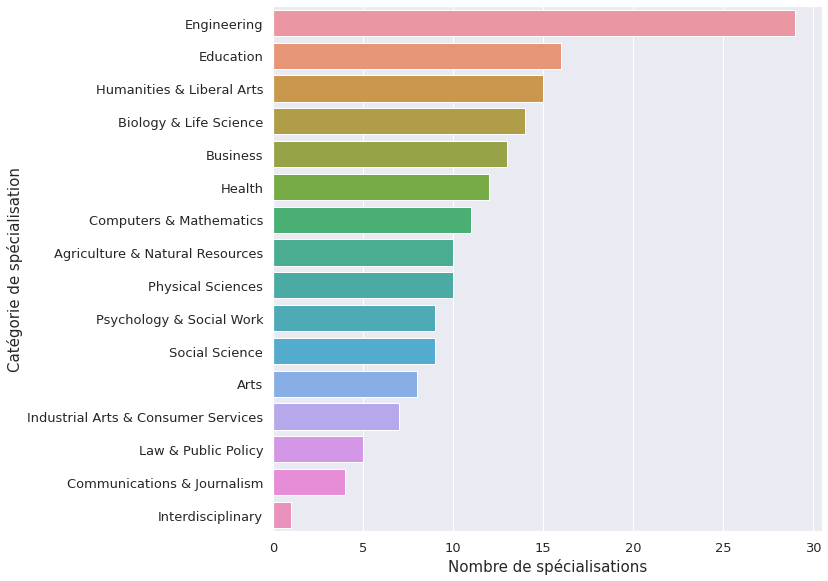

In [12]:
ax = sns.barplot(
    data=df[[MAJOR_CATEGORY]]
    .value_counts()
    .reset_index()
    .rename(columns={0: "Nombre de spécialisations"}),
    x="Nombre de spécialisations",
    y=MAJOR_CATEGORY,
)
ax.set_ylabel("Catégorie de spécialisation")
ax.figure.tight_layout()
ax.figure.savefig("../rapport/figures/nb_spe_by_category.pdf", dpi=300)

In [13]:
df[MAJOR_CATEGORY].value_counts().describe()

count   16.00
mean    10.81
std      6.32
min      1.00
25%      7.75
50%     10.00
75%     13.25
max     29.00
Name: Major_category, dtype: float64

> La catégorie *Engineering* contient le plus de spécialisations (>29), les autres se situent en moyenne autour d'une dizaine.

### Population totale par catégorie

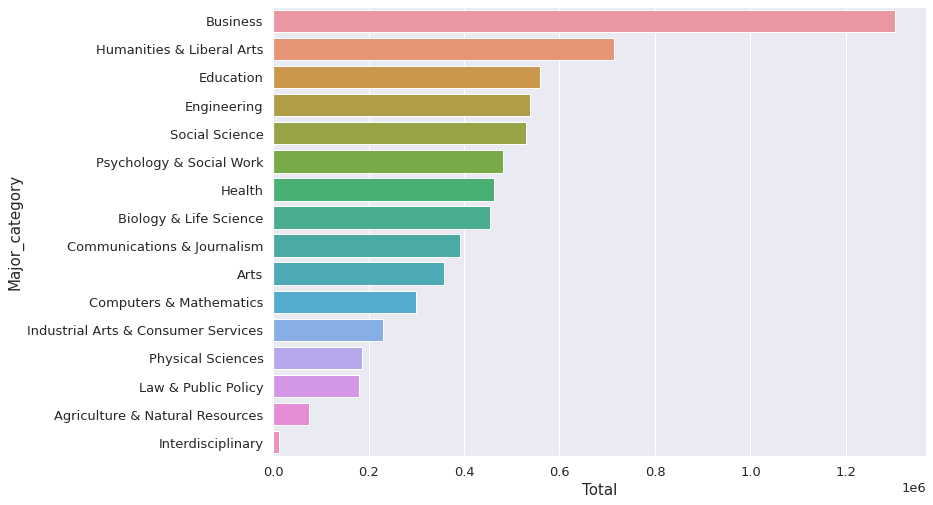

In [14]:
major_category_sorted_by_population_size = (
    df.groupby([MAJOR_CATEGORY], as_index=False)[TOTAL]
    .sum()
    .sort_values(TOTAL, ascending=False)
)
ax = sns.barplot(
    data=df.groupby([MAJOR_CATEGORY], as_index=False)[TOTAL]
    .sum()
    .sort_values(TOTAL, ascending=False),
    y=MAJOR_CATEGORY,
    x=TOTAL,
)

In [15]:
major_category_sorted_by_population_size

Major_category        Total
3                              Business 1,302,376.00
9             Humanities & Liberal Arts   713,468.00
6                             Education   559,129.00
7                           Engineering   537,583.00
15                       Social Science   529,966.00
14             Psychology & Social Work   481,007.00
8                                Health   463,230.00
2                Biology & Life Science   453,862.00
4           Communications & Journalism   392,601.00
1                                  Arts   357,130.00
5               Computers & Mathematics   299,008.00
10  Industrial Arts & Consumer Services   229,792.00
13                    Physical Sciences   185,479.00
12                  Law & Public Policy   179,107.00
0       Agriculture & Natural Resources    75,620.00
11                    Interdisciplinary    12,296.00

In [16]:
(1302376 - 713468) / 713468

0.8254161363929426

> La catégorie *Business* est la plus populée, suivi de *Humanities & Liberal Arts*, mais reste presque deux fois supérieur (~82,5%)

### Catégorie de spécialisation triées par valeurs médianes des revenus médians décroissantes

In [17]:
major_category_by_median_earning = (
    df.groupby([MAJOR_CATEGORY])[MEDIAN].median().sort_values(ascending=False)
)

In [18]:
major_category_by_median_earning

Major_category
Engineering                           57,000.00
Computers & Mathematics               45,000.00
Business                              40,000.00
Physical Sciences                     39,500.00
Social Science                        38,000.00
Biology & Life Science                36,300.00
Law & Public Policy                   36,000.00
Agriculture & Natural Resources       35,000.00
Communications & Journalism           35,000.00
Health                                35,000.00
Industrial Arts & Consumer Services   35,000.00
Interdisciplinary                     35,000.00
Education                             32,750.00
Humanities & Liberal Arts             32,000.00
Arts                                  30,750.00
Psychology & Social Work              30,000.00
Name: Median, dtype: float64

In [19]:
(57 - 45) / 45

0.26666666666666666

In [20]:
major_category_by_median_earning.describe()

count       16.00
mean    37,018.75
std      6,495.43
min     30,000.00
25%     34,437.50
50%     35,000.00
75%     38,375.00
max     57,000.00
Name: Median, dtype: float64

> En médiane, la catégorie *Engineering* a le revenu médian le plus élevé (~26% supérieur au 2ème, *Computers & Mathematics*).

### Statistiques descriptives

In [21]:
desc = df.describe().T
desc["count"] = 173 - desc["count"]
desc["EI"] = desc["75%"] - desc["25%"]
desc.rename(columns={
    "count": "Valeurs manquantes",
    "mean": "Moyenne",
    "50%" : "Médiane",
    "std": "Écart-type corrigé",
}, inplace=True)
desc.reindex(columns=[
    "Valeurs manquantes",
    "Médiane",
    "Écart-type corrigé",
    "EI",
    "min",
    "25%",
    "75%",
    "max"
])
desc.to_latex().replace(",", " ").replace("\n", " ")

'\\begin{tabular}{lrrrrrrrrr} \\toprule {} &  Valeurs manquantes &   Moyenne &  Écart-type corrigé &       min &       25\\% &   Médiane &       75\\% &        max &        EI \\\\ \\midrule Rank                 &                0.00 &     87.00 &               50.08 &      1.00 &     44.00 &     87.00 &    130.00 &     173.00 &     86.00 \\\\ Major\\_code           &                0.00 &  3 879.82 &            1 687.75 &  1 100.00 &  2 403.00 &  3 608.00 &  5 503.00 &   6 403.00 &  3 100.00 \\\\ Total                &                1.00 & 39 370.08 &           63 483.49 &    124.00 &  4 549.75 & 15 104.00 & 38 909.75 & 393 735.00 & 34 360.00 \\\\ Men                  &                1.00 & 16 723.41 &           28 122.43 &    119.00 &  2 177.50 &  5 434.00 & 14 631.00 & 173 809.00 & 12 453.50 \\\\ Women                &                1.00 & 22 646.67 &           41 057.33 &      0.00 &  1 778.25 &  8 386.50 & 22 553.75 & 307 087.00 & 20 775.50 \\\\ ShareWomen           &          

In [22]:
stats.percentileofscore(df[SAMPLE_SIZE], 30)

19.36416184971098

In [23]:
df.loc[df[FULL_TIME_YEAR_ROUND] > df[COLLEGE_JOBS], [MAJOR, TOTAL, MEN, WOMEN, EMPLOYED, FULL_TIME, PART_TIME, FULL_TIME_YEAR_ROUND, COLLEGE_JOBS, NON_COLLEGE_JOBS, LOW_WAGE_JOBS]]

Major     Total       Men     Women  \
1               MINING AND MINERAL ENGINEERING    756.00    679.00     77.00   
3    NAVAL ARCHITECTURE AND MARINE ENGINEERING  1,258.00  1,123.00    135.00   
5                          NUCLEAR ENGINEERING  2,573.00  2,200.00    373.00   
6                            ACTUARIAL SCIENCE  3,777.00  2,110.00  1,667.00   
8                       MECHANICAL ENGINEERING 91,227.00 80,320.00 10,907.00   
..                                         ...       ...       ...       ...   
167                   COMPOSITION AND RHETORIC 18,953.00  7,022.00 11,931.00   
168                                    ZOOLOGY  8,409.00  3,050.00  5,359.00   
170                        CLINICAL PSYCHOLOGY  2,838.00    568.00  2,270.00   
171                      COUNSELING PSYCHOLOGY  4,626.00    931.00  3,695.00   
172                            LIBRARY SCIENCE  1,098.00    134.00    964.00   

     Employed  Full_time  Part_time  Full_time_year_round  College_jobs  \
1         640        556        170                   388           350   
3         758       1069        150                   692           529   
5        1857       2038        264                  1449          1142   
6        2912       2924        296                  2482          1768   
8       76442      71298      13101                 54639         52844   
..        ...        ...        ...                   ...           ...   
167     15053      10121       6612                  7832          4855   
168      6259       5043       2190                  3602          2771   
170      2101       1724        648                  1293           986   
171      3777       3154        965                  2738          2403   
172       742        593        237                   410           288   

     Non_college_jobs  Low_wage_jobs  
1                 257             50  
3                 102              0  
5                 657            244  
6                 314            259  
8               16384           3253  
..                ...            ...  
167              8100           3466  
168              2947            743  
170               870            622  
171              1245            308  
172               338            192  

[133 rows x 11 columns]

### Corrélation des variables

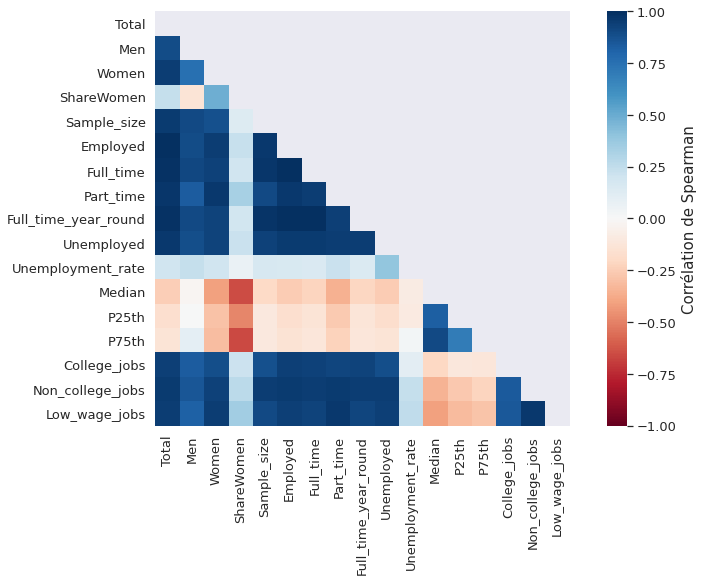

In [24]:
corr = df.drop([RANK, MAJOR_CODE], axis=1).corr(method="spearman")
mask = np.triu(np.ones_like(corr, dtype=bool))

g = sns.heatmap(
    corr,
    mask=mask,
    cmap=cm.RdBu,
    cbar_kws={"label": "Corrélation de Spearman"},
    vmin=-1,
    vmax=1,
    square=True,

)
g.figure.tight_layout()
g.figure.savefig("../rapport/figures/var_spearman_corr.pdf", dpi=300)

In [25]:
tmp_df = pd.DataFrame(
    [
        df.loc[df[MAJOR_CATEGORY] == major_category, [SHAREWOMEN, MEDIAN]]
        .corr(method="spearman")
        .loc[SHAREWOMEN, MEDIAN]
        for major_category in df[MAJOR_CATEGORY].unique()
    ],
    index=[i for i in df[MAJOR_CATEGORY].unique()],
)
tmp_df["count"] = df.groupby(MAJOR_CATEGORY)[MAJOR].count()
tmp_df.sort_values("count")

0  count
Interdisciplinary                     NaN      1
Communications & Journalism          0.77      4
Law & Public Policy                 -0.21      5
Industrial Arts & Consumer Services -0.89      7
Arts                                -0.55      8
Social Science                      -0.55      9
Psychology & Social Work            -0.55      9
Physical Sciences                    0.18     10
Agriculture & Natural Resources     -0.52     10
Computers & Mathematics              0.06     11
Health                               0.09     12
Business                            -0.78     13
Biology & Life Science              -0.17     14
Humanities & Liberal Arts            0.03     15
Education                           -0.12     16
Engineering                         -0.33     29

## ACP

In [67]:
population_variables = [
    MEN,
    WOMEN,
    EMPLOYED,
    FULL_TIME,
    PART_TIME,
    FULL_TIME_YEAR_ROUND,
    UNEMPLOYED,
    COLLEGE_JOBS,
    NON_COLLEGE_JOBS,
    LOW_WAGE_JOBS,
]
population_variables_and_total = [TOTAL] + population_variables

In [68]:
def CP(i: int) -> str:
    assert i > 0

    return f"PC{i} ({pca_model.explained_variance_ratio_[i-1] * 100:.2f}%)"

In [69]:
# cos2 : coord ** 2
# contrib : (cos2 / cos2.sum() PC wise) * 100


def variable_cos2():
    """Contribution relative d'un axe à une variable"""
    return acp_loadings ** 2


def variable_contrib():
    """Contribution relative d'une variable à un axe"""
    return variable_cos2() / variable_cos2().sum(axis=0)


def individual_cos2():
    """Contribution relative d'un axe à un individu"""
    return (
        acp_transformed / np.linalg.norm(acp, axis=1).reshape((172, 1))
    ) ** 2  # row-wise sum (for each axis) = 1


def individual_contrib():
    """Contribution relative d'un individu à un axe"""
    return individual_cos2() / individual_cos2().sum(axis=0)

$$COR(i,\alpha)=\frac{c_{i\alpha}^2}{\lVert x_i\rVert^2}$$

$$v_\alpha = \frac{c_\alpha}{\sqrt{\lambda_\alpha}}$$

$$CTR\left(i,\alpha\right)=\frac{c_{i\alpha}^2}{\lambda_\alpha}=v_\alpha^2$$

In [70]:
def variable_factor_map(a, b, gradient=None, color_map=None, autoscale=True):
    assert a > 0
    assert a <= n_feat
    assert b > 0
    assert b <= n_feat
    fig, ax = plt.subplots(figsize=(12.1, 10))
    jitter = 0.05
    ax.set(ylim=(-1.1, 1.1), xlim=(-1.1, 1.1), xlabel=CP(a), ylabel=CP(b))
    colors = [
        "r",
        "g",
        "b",
        "c",
        "m",
        "y",
        "k",
        "dodgerblue",
        "darkorange",
        "forestgreen",
        "royalblue",
        "lime",
        "deeppink",
        "darkslategrey",
    ]
    loadings = acp_components * np.sqrt(pca_model.explained_variance_)

    # ARROW GRADIENT
    if gradient == "cos2":
        grad_values = (
            variable_cos2().iloc[:, [a - 1, b - 1]].sum(axis=1).to_numpy()
        )  # Sum for PCs
    elif gradient == "contrib":
        grad_values = (
            variable_contrib().iloc[:, [a - 1, b - 1]].sum(axis=1).to_numpy()
        )  # Sum for PCs
    else:
        raise ValueError("gradient is neither cos2 nor contrib.")
    if color_map is None:
        color_map = cm.Blues
    norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
    if autoscale:
        norm.autoscale(grad_values)
    scalar_map = cm.ScalarMappable(cmap=color_map, norm=norm)

    for i in range(0, acp_components.shape[0]):
        arrow_options = {
            "x": 0,
            "y": 0,
            "dx": (loadings.iloc[i, a - 1]),
            "dy": (loadings.iloc[i, b - 1]),
            "head_width": 0.03,
            "head_length": 0.03,
            "length_includes_head": True,
        }
        if gradient is None:
            ax.arrow(
                **arrow_options,
                color=colors[i],
            )
        else:
            ax.arrow(
                **arrow_options,
                color=color_map(norm(grad_values[i])),
            )
        plt.text(
            loadings.iloc[i, a - 1] + jitter * np.sign(loadings.iloc[i, a - 1]),
            loadings.iloc[i, b - 1] + jitter * np.sign(loadings.iloc[i, b - 1]),
            loadings.index.values[i],
        )
    x = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(x), np.sin(x), label="unit circle", color="k")
    plt.legend()
    if gradient is not None:
        colorbar = plt.colorbar(scalar_map)
        colorbar.set_label(gradient, rotation=270)

    return fig, ax

In [71]:
def heatmap(df, gradient, annots=False, vmin=0, vmax=1, y_label="Variables"):
    args = {
        "vmin": vmin,
        "vmax": vmax,
        "cmap": cm.cividis,
        "fmt": "s",
        "cbar_kws": {"label": gradient},
    }

    if annots:
        tmp_df = df.copy()
        tmp_df.iloc[:, [i for i in range(3, tmp_df.shape[1])]] = pd.NA
        tmp_df = tmp_df.round(3).astype(str).replace("<NA>", "")
        args["annot"] = tmp_df

    g = sns.heatmap(df, **args)
    var = plt.xlabel("Axes principaux")
    var = plt.ylabel(y_label)

    return g

### SCALING PAR LE TOTAL

In [72]:
acp = (
    df[population_variables].div(df[TOTAL], axis=0).dropna().copy(deep=True)
)  # drop food science index 21

## NORMALIZER 0 1 
# scaler = preprocessing.MinMaxScaler()
# acp = scaler.fit_transform(df[population_variables].dropna())
# acp = pd.DataFrame(acp, index=df[population_variables].dropna().index, columns=df[population_variables].dropna().columns)

# ## QUANTILES SCALER 
# scaler = preprocessing.RobustScaler()
# acp = scaler.fit_transform(df[population_variables].dropna())
# acp = pd.DataFrame(acp, index=df[population_variables].dropna().index, columns=df[population_variables].dropna().columns)

acp[TOTAL] = df[TOTAL]
acp[MEDIAN] = df[MEDIAN]
acp[P25TH] = df[P25TH]
acp[P75TH] = df[P75TH]
# acp[[MEDIAN, P25TH, P25TH]] = acp[[MEDIAN, P25TH, P25TH]].div(df[TOTAL], axis=0)
standardizer = preprocessing.StandardScaler()
acp = pd.DataFrame(
    standardizer.fit_transform(acp),
    columns=acp.columns,
    index=df[MAJOR_CATEGORY].drop(21),  # drop food science index 21
)

In [73]:
n_feat = 13
pca_model = PCA(n_components=n_feat)
pca_model.fit(acp)
acp_columns = [CP(i + 1) for i in range(n_feat)]
acp_transformed = pd.DataFrame(
    pca_model.transform(acp), columns=acp_columns, index=acp.index
)
acp_components = pd.DataFrame(
    pca_model.components_.T, columns=acp_columns, index=acp.columns
)
acp_loadings = pd.DataFrame(
    pca_model.components_.T * np.sqrt(pca_model.explained_variance_),
    columns=acp_columns,
    index=acp.columns,
)

#### INTERTIE PAR AXE

In [74]:
# Functions from @Mateen Ulhaq and @karlo
def set_axes_equal(ax: plt.Axes):
    """Set 3D plot axes to equal scale.

    Make axes of 3D plot have equal scale so that spheres appear as
    spheres and cubes as cubes.  Required since `ax.axis('equal')`
    and `ax.set_aspect('equal')` don't work on 3D.
    """
    limits = np.array([
        ax.get_xlim3d(),
        ax.get_ylim3d(),
        ax.get_zlim3d(),
    ])
    origin = np.mean(limits, axis=1)
    radius = 0.5 * np.max(np.abs(limits[:, 1] - limits[:, 0]))
    _set_axes_radius(ax, origin, radius)

def _set_axes_radius(ax, origin, radius):
    x, y, z = origin
    ax.set_xlim3d([x - radius, x + radius])
    ax.set_ylim3d([y - radius, y + radius])
    ax.set_zlim3d([z - radius, z + radius])

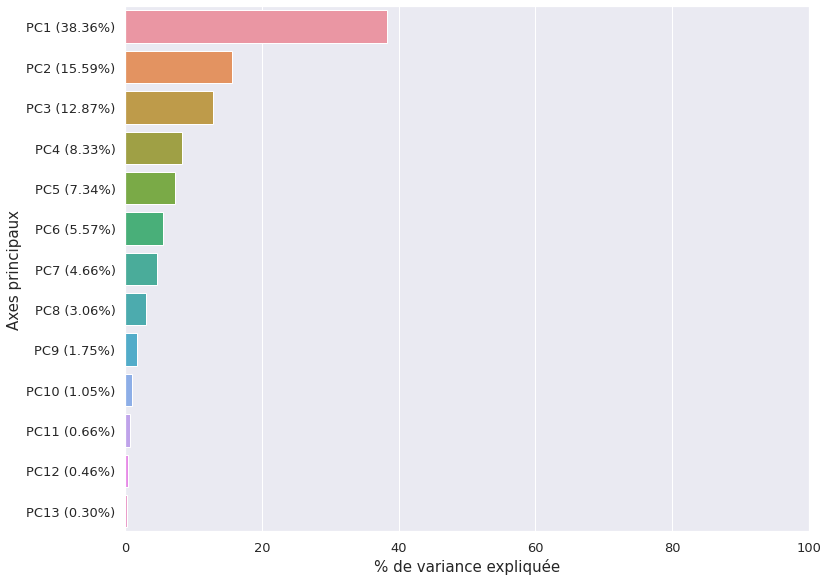

In [75]:
tmp_df = pd.DataFrame(
    {
        "% de variance expliquée": pca_model.explained_variance_ratio_ * 100,
        "Axes principaux": acp_columns,
    }
)
g = sns.barplot(
    x="% de variance expliquée",
    y="Axes principaux",
    data=tmp_df.reset_index(),
    orient="h",
)  # en ne divisant pas par le total
var = g.set(xlim=(0, 100))
g.figure.tight_layout()
g.figure.savefig("../rapport/figures/acp_inertie.pdf", dpi=300)

#### NUAGE DE POINTS

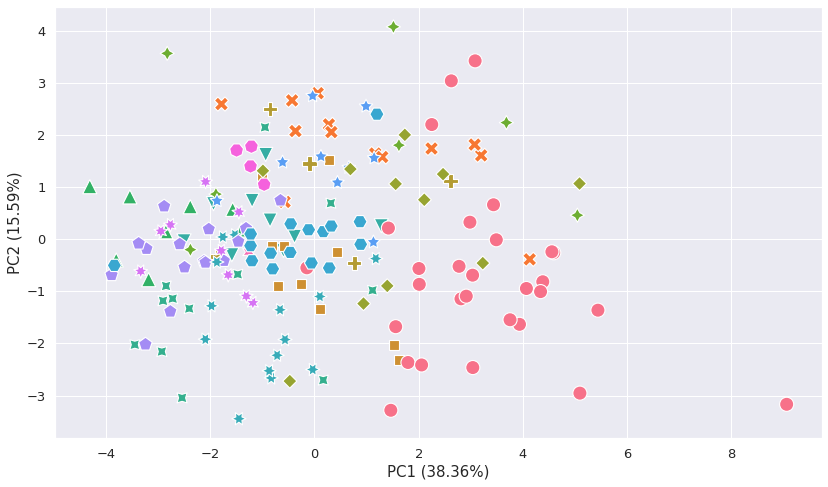

In [76]:
g = sns.scatterplot(
    data=acp_transformed,
    x=CP(1),
    y=CP(2),
    hue=acp_transformed.index,
    style=acp_transformed.index,
    s=200,
    legend=False
)
# g.legend(loc="center left", bbox_to_anchor=(1, 0.5), markerscale=2)
g.figure.tight_layout()
g.set_aspect("equal", "box")
g.figure.savefig("../rapport/figures/individual_factor_map_1_2.pdf", dpi=300)

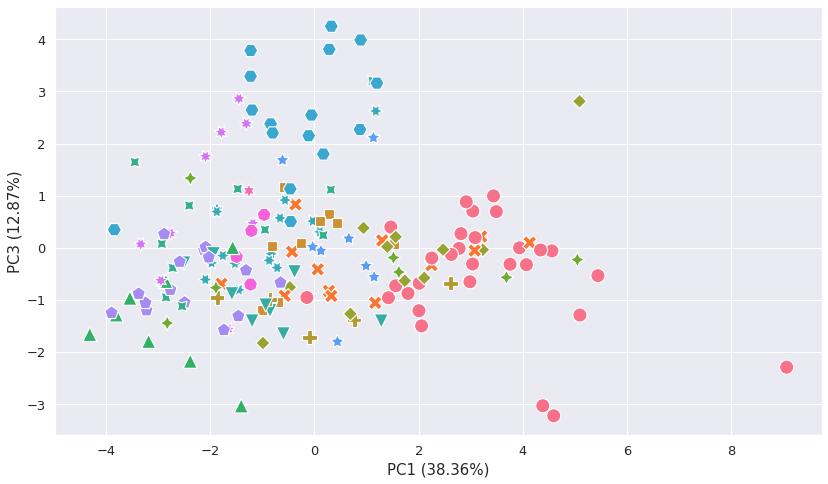

In [77]:
g = sns.scatterplot(
    data=acp_transformed,
    x=CP(1),
    y=CP(3),
    hue=acp_transformed.index,
    style=acp_transformed.index,
    s=200,
    legend=False
)
# g.legend(loc="center left", bbox_to_anchor=(1, 0.5), markerscale=2)
g.figure.tight_layout()
g.set_aspect("equal", "box")
g.figure.savefig("../rapport/figures/individual_factor_map_1_3.pdf", dpi=300)

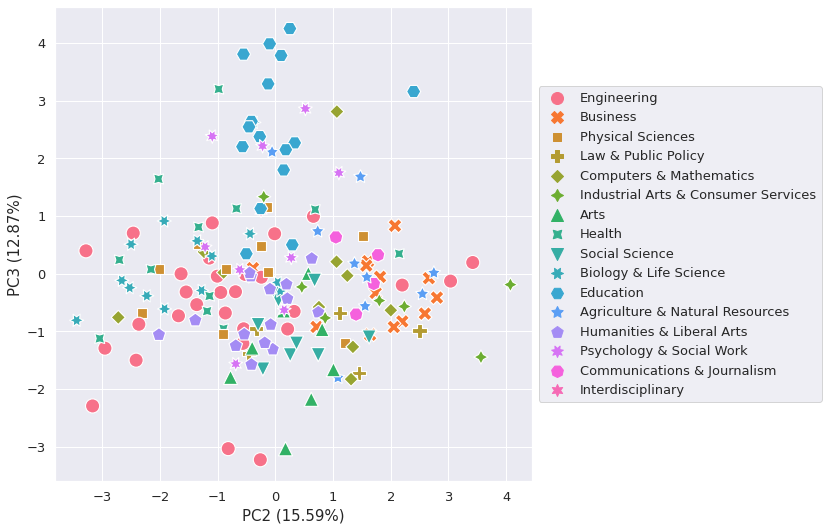

In [82]:
g = sns.scatterplot(
    data=acp_transformed,
    x=CP(2),
    y=CP(3),
    hue=acp_transformed.index,
    style=acp_transformed.index,
    s=200,
    legend=True
)
g.legend(loc="center left", bbox_to_anchor=(1, 0.5), markerscale=2)
g.figure.tight_layout()
g.set_aspect("equal", "box")
g.figure.savefig("../rapport/figures/individual_factor_map_2_3.pdf", dpi=300)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

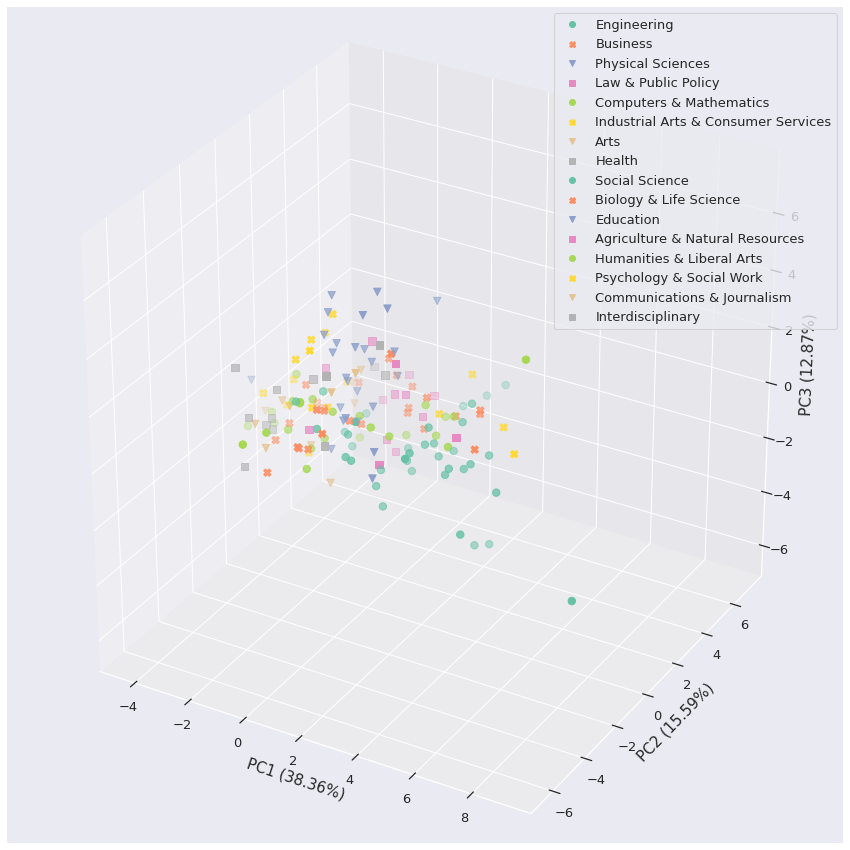

In [78]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Unique category labels: 'D', 'F', 'G', ...
color_labels = acp_transformed.index.unique()

# List of RGB triplets
rgb_values = sns.color_palette("Set2", 16)

# List of markers
marker_values = ["o", "X", "v", "s"] * 4

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

for (major_category, marker) in zip(color_map, marker_values):
    ax.scatter(
        acp_transformed.loc[acp_transformed.index == major_category, CP(1)],
        acp_transformed.loc[acp_transformed.index == major_category, CP(2)],
        acp_transformed.loc[acp_transformed.index == major_category, CP(3)],
        c=color_map[major_category],
        marker=marker,
        s=55
    )
ax.set_xlabel(CP(1))
ax.set_ylabel(CP(2))
ax.set_zlabel(CP(3))

ax.set_box_aspect([1,1,1])
fig.tight_layout()
set_axes_equal(ax)

f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]

ax.legend(
    [f(marker, color_map[major_category]) for major_category, marker in zip(color_map, marker_values)],
    list(color_map.keys())
)

# for ii in range(0,360,1):
#         ax.view_init(elev=10., azim=ii)
#         fig.savefig("movie%d.pdf" % ii, dpi=100)

#### CERCLE DE CORRELATION DES VARIABLES

In [80]:
acp_loadings

PC1 (38.36%)  PC2 (15.59%)  PC3 (12.87%)  PC4 (8.33%)  \
Men                           0.78          0.12         -0.43         0.19   
Women                        -0.78         -0.12          0.43        -0.19   
Employed                      0.04          0.45          0.26        -0.77   
Full_time                     0.66          0.65          0.28        -0.02   
Part_time                    -0.77         -0.39         -0.24        -0.22   
Full_time_year_round          0.59          0.69          0.26         0.10   
Unemployed                   -0.24          0.14         -0.51        -0.15   
College_jobs                  0.38         -0.50          0.60        -0.29   
Non_college_jobs             -0.52          0.60         -0.43        -0.18   
Low_wage_jobs                -0.66          0.22         -0.34        -0.22   
Total                        -0.14          0.16          0.02        -0.16   
Median                        0.84         -0.27         -0.29        -0.27   
P25th                         0.78         -0.24         -0.20        -0.26   
P75th                         0.75         -0.28         -0.36        -0.31   

                      PC5 (7.34%)  PC6 (5.57%)  PC7 (4.66%)  PC8 (3.06%)  \
Men                         -0.14        -0.12        -0.35         0.05   
Women                        0.14         0.12         0.35        -0.05   
Employed                    -0.23        -0.04        -0.23        -0.10   
Full_time                    0.01         0.08         0.06         0.08   
Part_time                   -0.14        -0.12        -0.14        -0.14   
Full_time_year_round         0.05         0.08         0.13        -0.01   
Unemployed                   0.23         0.76        -0.14        -0.01   
College_jobs                -0.10         0.14        -0.25         0.19   
Non_college_jobs            -0.19        -0.16         0.11        -0.19   
Low_wage_jobs               -0.06        -0.13         0.11         0.56   
Total                        0.90        -0.28        -0.22        -0.01   
Median                       0.05        -0.06         0.20        -0.02   
P25th                        0.12         0.01         0.33        -0.00   
P75th                        0.04        -0.06         0.10        -0.02   

                      PC9 (1.75%)  PC10 (1.05%)  PC11 (0.66%)  PC12 (0.46%)  \
Men                         -0.06         -0.01         -0.00         -0.00   
Women                        0.06          0.01          0.00          0.00   
Employed                     0.00         -0.10          0.10         -0.05   
Full_time                    0.05          0.04          0.03          0.20   
Part_time                   -0.15          0.24          0.08          0.08   
Full_time_year_round        -0.11          0.23          0.01         -0.12   
Unemployed                  -0.01          0.00         -0.01          0.00   
College_jobs                -0.06          0.07         -0.17          0.01   
Non_college_jobs            -0.02          0.00         -0.21          0.02   
Low_wage_jobs               -0.01          0.02          0.02         -0.02   
Total                       -0.02          0.01         -0.02          0.01   
Median                       0.01         -0.00          0.02          0.03   
P25th                       -0.31         -0.07         -0.01          0.00   
P75th                        0.32          0.12         -0.02         -0.03   

                      PC13 (0.30%)  
Men                           0.01  
Women                        -0.01  
Employed                      0.00  
Full_time                     0.03  
Part_time                     0.01  
Full_time_year_round         -0.03  
Unemployed                   -0.01  
College_jobs                 -0.01  
Non_college_jobs             -0.01  
Low_wage_jobs                -0.00  
Total                        -0.00  
Median                       -0.16  
P25th                       

##### Contribution relative des axes aux variables

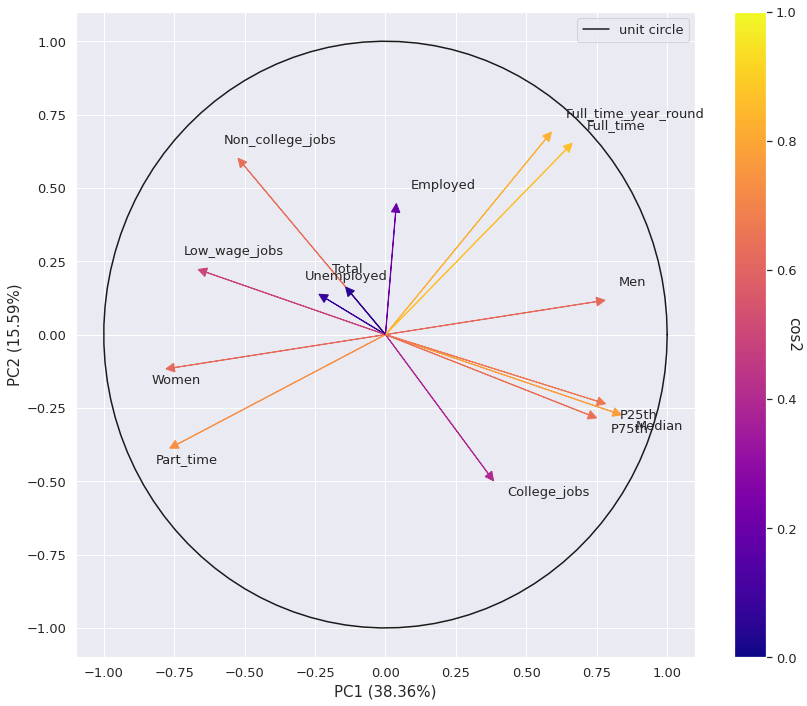

In [79]:
fig, ax = variable_factor_map(1, 2, "cos2", cm.plasma, autoscale=False)
# ax.legend(loc="center left", bbox_to_anchor=(1.25, 0.5))
fig.tight_layout()
fig.savefig("../rapport/figures/variable_factor_map_1_2.pdf", dpi=300)

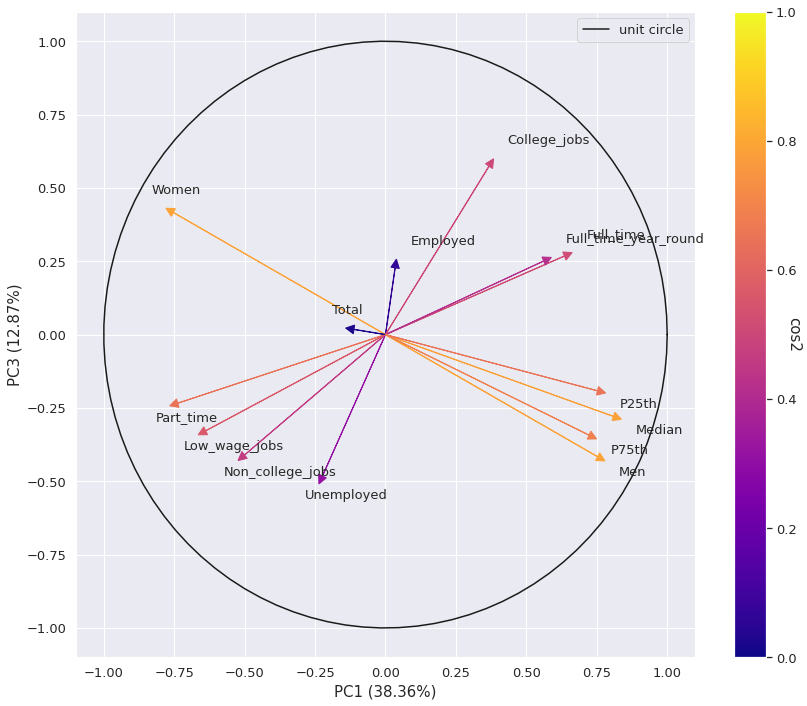

In [39]:
fig, ax = variable_factor_map(1, 3, "cos2", cm.plasma, autoscale=False)
fig.tight_layout()
fig.savefig("../rapport/figures/variable_factor_map_1_3.pdf", dpi=300)
# ax.legend(loc="center left", bbox_to_anchor=(1.25, 0.5))

In [40]:
acp_loadings

PC1 (38.36%)  PC2 (15.59%)  PC3 (12.87%)  PC4 (8.33%)  \
Men                           0.78          0.12         -0.43         0.19   
Women                        -0.78         -0.12          0.43        -0.19   
Employed                      0.04          0.45          0.26        -0.77   
Full_time                     0.66          0.65          0.28        -0.02   
Part_time                    -0.77         -0.39         -0.24        -0.22   
Full_time_year_round          0.59          0.69          0.26         0.10   
Unemployed                   -0.24          0.14         -0.51        -0.15   
College_jobs                  0.38         -0.50          0.60        -0.29   
Non_college_jobs             -0.52          0.60         -0.43        -0.18   
Low_wage_jobs                -0.66          0.22         -0.34        -0.22   
Total                        -0.14          0.16          0.02        -0.16   
Median                        0.84         -0.27         -0.29        -0.27   
P25th                         0.78         -0.24         -0.20        -0.26   
P75th                         0.75         -0.28         -0.36        -0.31   

                      PC5 (7.34%)  PC6 (5.57%)  PC7 (4.66%)  PC8 (3.06%)  \
Men                         -0.14        -0.12        -0.35         0.05   
Women                        0.14         0.12         0.35        -0.05   
Employed                    -0.23        -0.04        -0.23        -0.10   
Full_time                    0.01         0.08         0.06         0.08   
Part_time                   -0.14        -0.12        -0.14        -0.14   
Full_time_year_round         0.05         0.08         0.13        -0.01   
Unemployed                   0.23         0.76        -0.14        -0.01   
College_jobs                -0.10         0.14        -0.25         0.19   
Non_college_jobs            -0.19        -0.16         0.11        -0.19   
Low_wage_jobs               -0.06        -0.13         0.11         0.56   
Total                        0.90        -0.28        -0.22        -0.01   
Median                       0.05        -0.06         0.20        -0.02   
P25th                        0.12         0.01         0.33        -0.00   
P75th                        0.04        -0.06         0.10        -0.02   

                      PC9 (1.75%)  PC10 (1.05%)  PC11 (0.66%)  PC12 (0.46%)  \
Men                         -0.06         -0.01         -0.00         -0.00   
Women                        0.06          0.01          0.00          0.00   
Employed                     0.00         -0.10          0.10         -0.05   
Full_time                    0.05          0.04          0.03          0.20   
Part_time                   -0.15          0.24          0.08          0.08   
Full_time_year_round        -0.11          0.23          0.01         -0.12   
Unemployed                  -0.01          0.00         -0.01          0.00   
College_jobs                -0.06          0.07         -0.17          0.01   
Non_college_jobs            -0.02          0.00         -0.21          0.02   
Low_wage_jobs               -0.01          0.02          0.02         -0.02   
Total                       -0.02          0.01         -0.02          0.01   
Median                       0.01         -0.00          0.02          0.03   
P25th                       -0.31         -0.07         -0.01          0.00   
P75th                        0.32          0.12         -0.02         -0.03   

                      PC13 (0.30%)  
Men                           0.01  
Women                        -0.01  
Employed                      0.00  
Full_time                     0.03  
Part_time                     0.01  
Full_time_year_round         -0.03  
Unemployed                   -0.01  
College_jobs                 -0.01  
Non_college_jobs             -0.01  
Low_wage_jobs                -0.00  
Total                        -0.00  
Median                       -0.16  
P25th                       

##### Contribution relative des variables aux axes

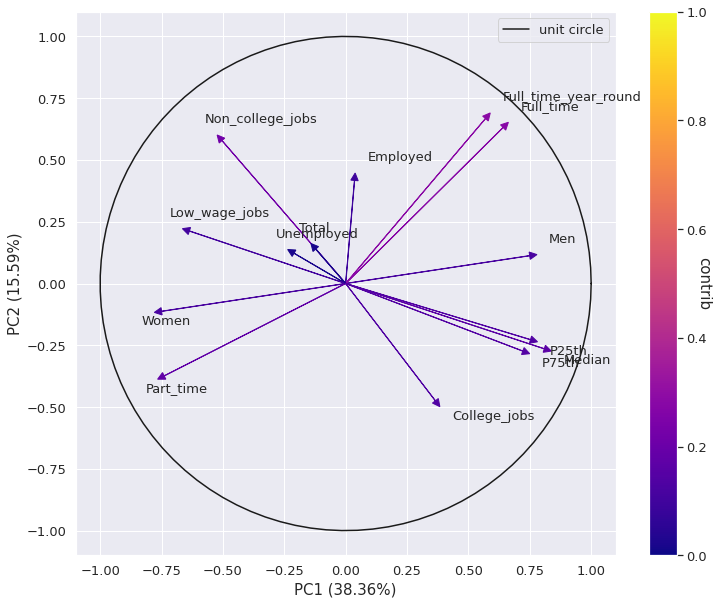

In [41]:
fig, ax = variable_factor_map(1, 2, "contrib", cm.plasma, autoscale=False)
# ax.legend(loc="center left", bbox_to_anchor=(1.25, 0.5))

#### Carte de chaleur des contributions relatives des axes aux variables

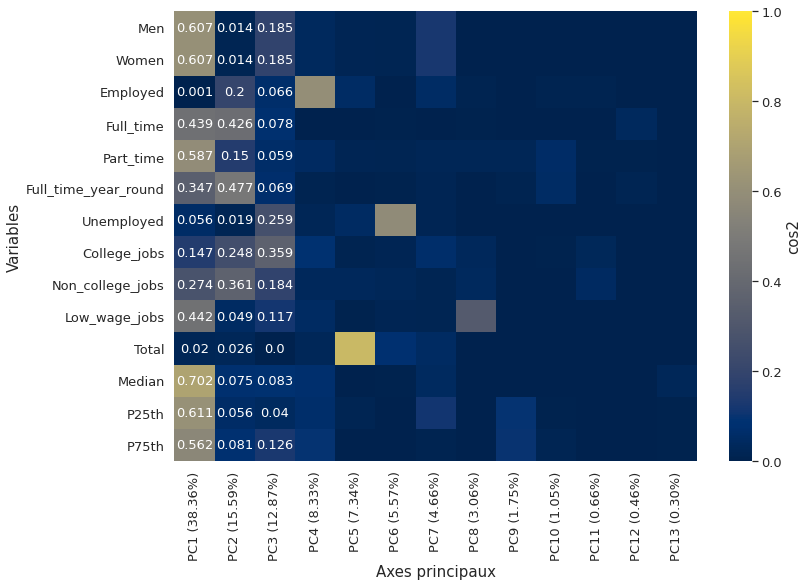

In [42]:
g = heatmap(variable_cos2(), "cos2", annots=True, vmax=1)

#### Carte de chaleur des contributions relatives des variables aux axes

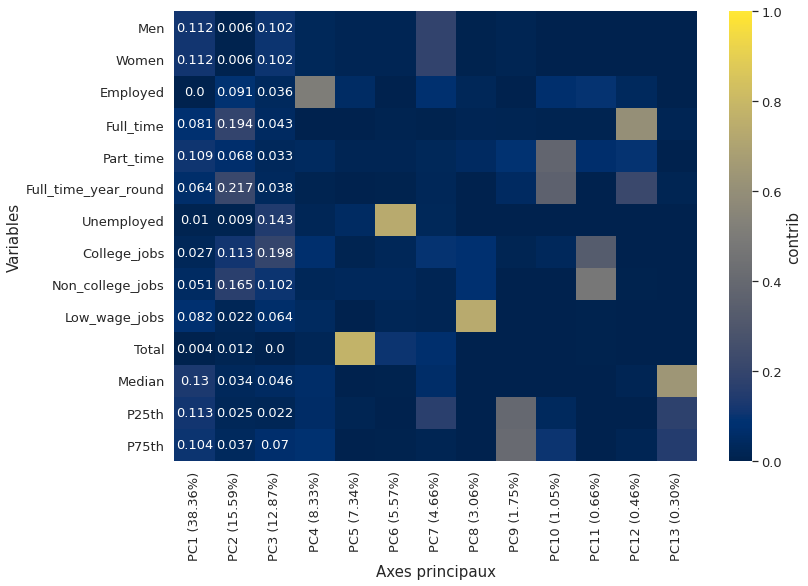

In [43]:
g = heatmap(variable_contrib(), "contrib", annots=True, vmax=1)

#### Carte de chaleur des contributions relatives des axes aux individus

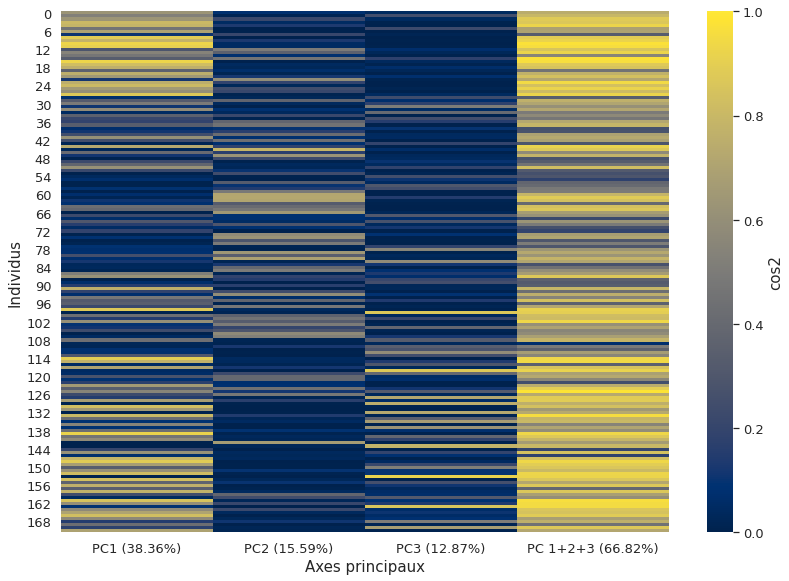

In [44]:
tmp_df = individual_cos2().loc[:, [CP(1), CP(2), CP(3)]]
tmp_df[f"PC 1+2+3 ({pca_model.explained_variance_ratio_[0:3].sum()*100:.2f}%)"] = individual_cos2().loc[:, [CP(1), CP(2), CP(3)]].sum(axis=1)
g = heatmap(tmp_df.reset_index(drop=True), "cos2", vmax=1, y_label="Individus")
g.figure.tight_layout()
g.figure.savefig("../rapport/figures/cos2_individual_1_2_3_sum.pdf", dpi=300)

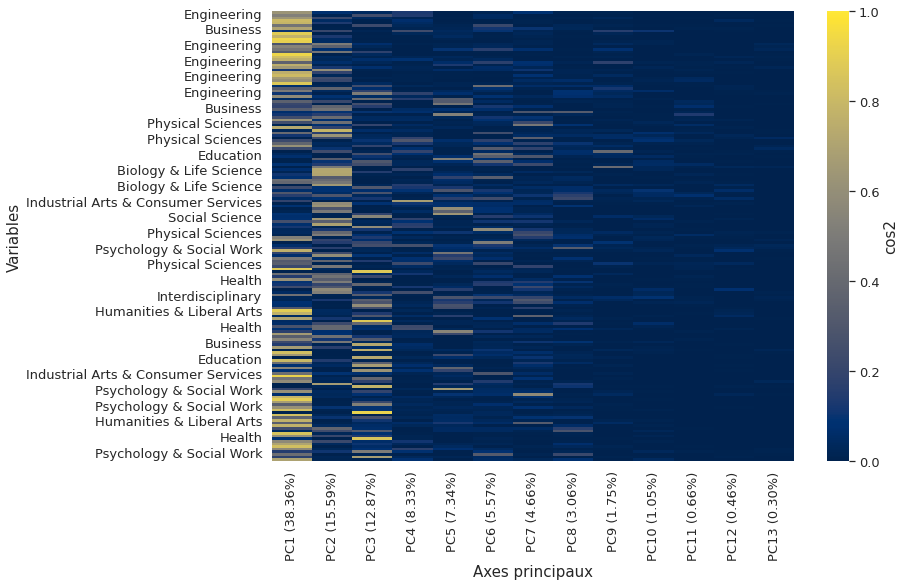

In [45]:
g = heatmap(individual_cos2(), "cos2", vmax=1)

#### Carte de chaleur des contributions relatives des individus aux axes

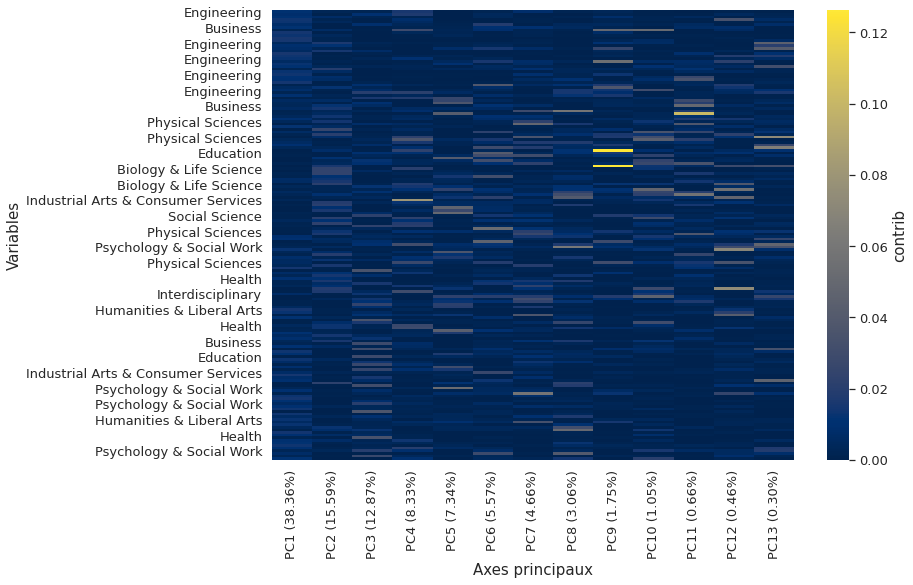

In [46]:
g = heatmap(individual_contrib(), "contrib", vmin=0, vmax=None)

### (NE PAS UTILISER) PAS DE SCALING PAR LA POPULATION TOTALE

In [47]:
acp = (
    df[population_variables_and_total].dropna().copy(deep=True)
)  # drop food science index 21
acp[TOTAL] = df[TOTAL]
acp[MEDIAN] = df[MEDIAN]
acp[P25TH] = df[P25TH]
acp[P75TH] = df[P75TH]
standardizer = preprocessing.StandardScaler()
acp = pd.DataFrame(
    standardizer.fit_transform(acp),
    columns=acp.columns,
    index=df[MAJOR_CATEGORY].drop(21),  # drop food science index 21
)

In [48]:
n_feat = 14
pca_model = PCA(n_components=n_feat)
pca_model.fit(acp)
acp_columns = [CP(i + 1) for i in range(n_feat)]
acp_transformed = pd.DataFrame(
    pca_model.transform(acp), columns=acp_columns, index=acp.index
)
acp_components = pd.DataFrame(
    pca_model.components_.T, columns=acp_columns, index=acp.columns
)
acp_loadings = pd.DataFrame(
    pca_model.components_.T * np.sqrt(pca_model.explained_variance_),
    columns=acp_columns,
    index=acp.columns,
)

In [49]:
pca_model.explained_variance_ratio_.cumsum() * 100

array([ 70.9890121 ,  90.26777406,  94.53363903,  96.56638238,
        98.4163476 ,  99.17535044,  99.50601267,  99.77099693,
        99.9053832 ,  99.97244376,  99.99506737,  99.99913342,
       100.        , 100.        ])

[(0.0, 1.0)]

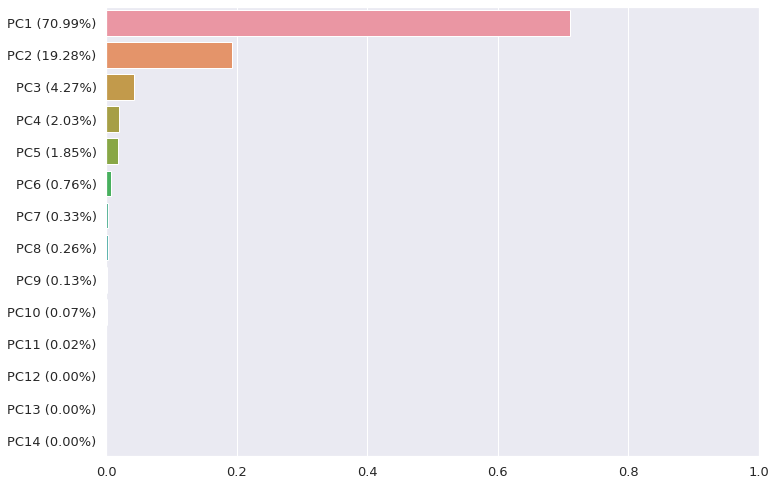

In [50]:
g = sns.barplot(
    pca_model.explained_variance_ratio_, acp_columns
)  # en ne divisant pas par le total
g.set(xlim=(0, 1))

(<Figure size 871.2x720 with 2 Axes>,
 <AxesSubplot:xlabel='PC1 (70.99%)', ylabel='PC2 (19.28%)'>)

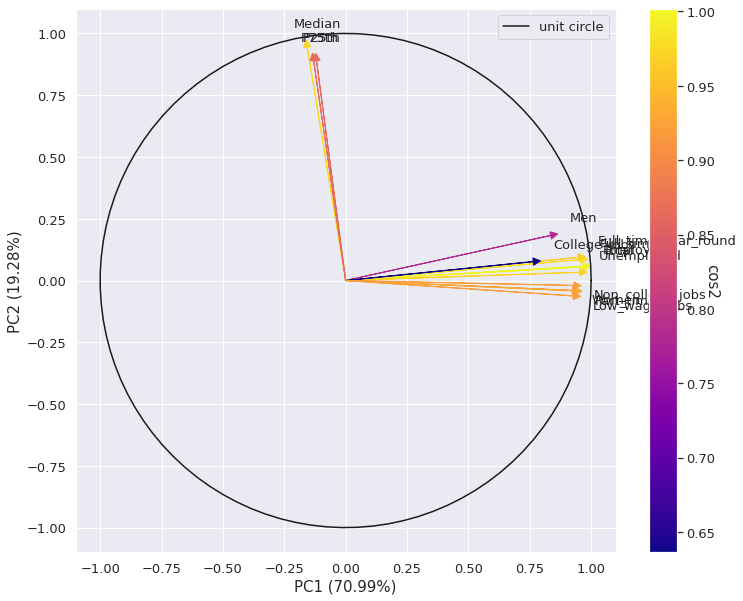

In [51]:
variable_factor_map(1, 2, "cos2", cm.plasma)

## Thèmes
- Population des diplômés
- Emploi
- Revenus médians
- Débouchées

### Population des diplômés

#### Population totale : répartition hommes/femmes

In [52]:
df[MEN].sum() / (df[MEN].sum() + df[WOMEN].sum())

0.42477450856171917

> La population est constitué à 57,5% de femmes, et 42,5% d'hommes.

In [53]:
pd.concat(
    [
        df[[MEN, WOMEN]].describe().round(2),
        df[[MEN, WOMEN]].agg({MEN: ["sum"], WOMEN: ["sum"]}),
    ],
    axis=0,
)

Men        Women
count       172.00       172.00
mean     16,723.41    22,646.67
std      28,122.43    41,057.33
min         119.00         0.00
25%       2,177.50     1,778.25
50%       5,434.00     8,386.50
75%      14,631.00    22,553.75
max     173,809.00   307,087.00
sum   2,876,426.00 3,895,228.00

In [54]:
(8386 - 5434) / 5434

0.5432462274567538

> La médiane du nombre de femmes est supérieure à celle du nombre d'hommes (~54%).

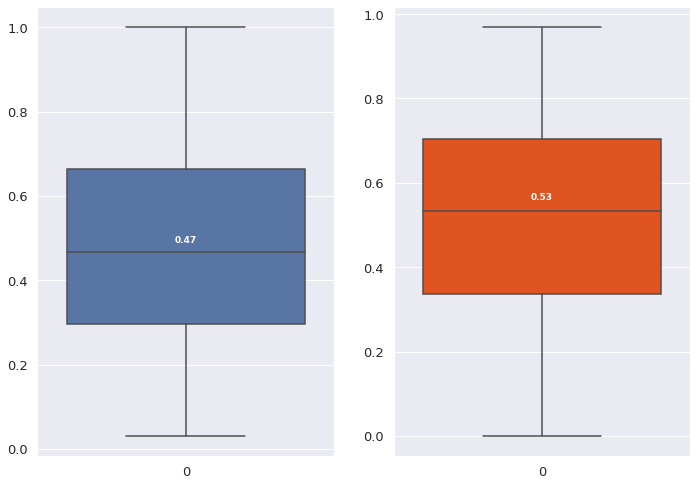

In [55]:
fig, ax = plt.subplots(1, 2)
men_ratio_dist = df[MEN] / df[TOTAL]
women_ratio_dist = df[WOMEN] / df[TOTAL]
box_1 = sns.boxplot(
    ax=ax[0],
    data=men_ratio_dist,
    # kde=True
)
box_2 = sns.boxplot(
    ax=ax[1],
    data=women_ratio_dist,
    # kde=True,
    color="orangered",
)
for box_plot, median in zip(
    [box_1, box_2],
    [men_ratio_dist.median(), women_ratio_dist.median()],
):
    for xtick in box_plot.get_xticks():
        box_plot.text(
            xtick,
            median + median * 0.05,
            round(median, 2),
            horizontalalignment="center",
            size="x-small",
            color="w",
            weight="semibold",
        )

> En médiane, une spécialisation a une part de femmes plus élevée.

#### Catégories avec une proportion d'hommes dominante (deux fois plus)

In [56]:
df.loc[df[SHAREWOMEN] < 1 / 3, MAJOR_CATEGORY].value_counts()

Engineering                            23
Computers & Mathematics                 7
Agriculture & Natural Resources         4
Industrial Arts & Consumer Services     4
Business                                2
Physical Sciences                       2
Law & Public Policy                     1
Name: Major_category, dtype: Int64

#### Catégories avec une proportion de femmes (deux fois plus)

In [57]:
df.loc[df[SHAREWOMEN] > 2 / 3, MAJOR_CATEGORY].value_counts()

Education                              11
Health                                 10
Humanities & Liberal Arts               9
Psychology & Social Work                8
Arts                                    4
Communications & Journalism             3
Agriculture & Natural Resources         2
Social Science                          2
Physical Sciences                       2
Business                                1
Biology & Life Science                  1
Interdisciplinary                       1
Law & Public Policy                     1
Industrial Arts & Consumer Services     1
Name: Major_category, dtype: Int64

#### Ratio hommes/femmes

##### Répartition hommes/femmes parmi les catégories triés par population décroissante

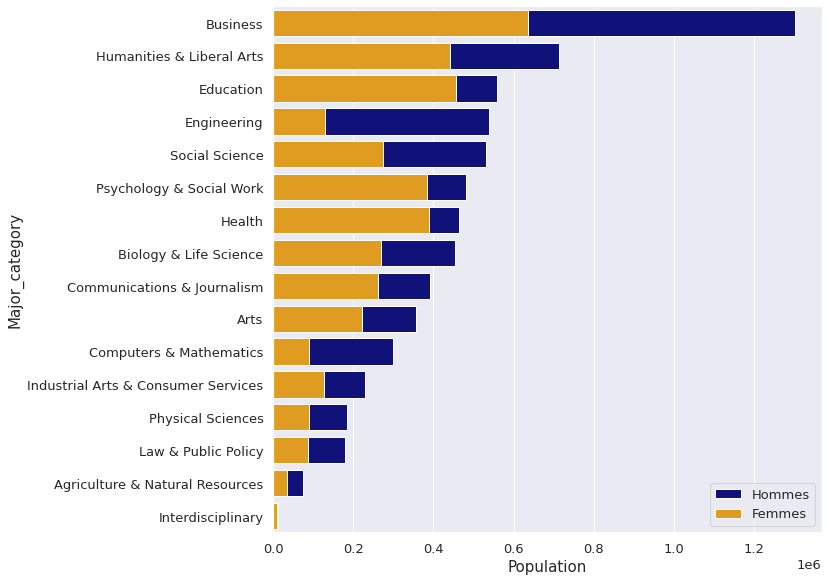

In [93]:
tmp_df = (
    df.groupby([MAJOR_CATEGORY], as_index=False)[[TOTAL, MEN, WOMEN]]
    .sum()
    .sort_values(TOTAL, ascending=False)
)
ax = sns.barplot(
    data=tmp_df, y=MAJOR_CATEGORY, x=TOTAL, orient="h", color="darkblue", label="Hommes"
)
sns.barplot(
    data=tmp_df, y=MAJOR_CATEGORY, x=WOMEN, orient="h", color="orange", label="Femmes"
)
var = ax.set_xlabel("Population")
var = ax.legend()
ax.figure.tight_layout()
ax.figure.savefig("../rapport/figures/pop_by_major_category_by_sex.pdf", dpi=300)

##### Distribution de la part des femmes par catégorie triés par population décroissante

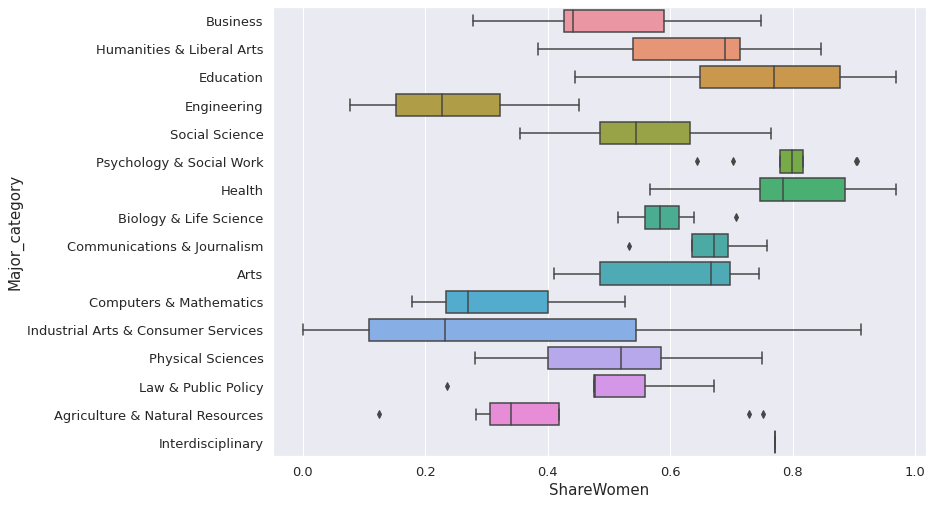

In [59]:
ax = sns.boxplot(
    data=df.rename(columns={SHAREWOMEN: SHAREWOMEN}).melt(
        id_vars=MAJOR_CATEGORY, value_vars=SHAREWOMEN, value_name=SHAREWOMEN
    ),
    y=MAJOR_CATEGORY,
    x=SHAREWOMEN,
    order=major_category_sorted_by_population_size[MAJOR_CATEGORY].to_list(),
)
# var = ax.set_xticklabels(ax.get_xticklabels(), rotation=35, horizontalalignment="right")

##### (NE PAS UTILISER) Distribution des différences relatives entre le nombre d'hommes et de femmes

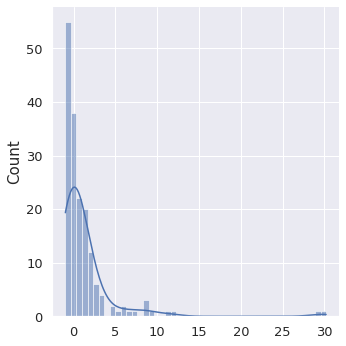

In [60]:
sns.displot(
    data=((df[WOMEN] - df[MEN]) / df[MEN]).replace([np.inf, -np.inf], np.nan),
    kde=True,
)

##### (NE PAS UTILISER) Différence relative entre le nombre d'hommes et de femmes par catégorie triés par revenu médian décroissant

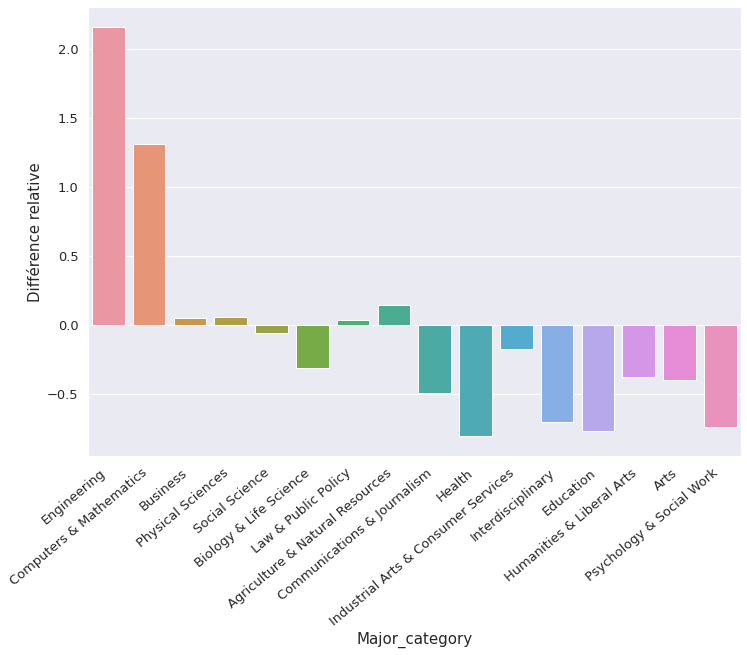

In [61]:
tmp_df = df.groupby(MAJOR_CATEGORY)[[MEN, WOMEN]].sum().reset_index()
tmp_df["Différence relative"] = (tmp_df[MEN] - tmp_df[WOMEN]) / tmp_df[WOMEN]
tmp_df
ax = sns.barplot(
    data=tmp_df,
    x=MAJOR_CATEGORY,
    y="Différence relative",
    order=major_category_by_median_earning.index.tolist(),
)
var = ax.set_xticklabels(ax.get_xticklabels(), rotation=40, horizontalalignment="right")

Dans la catégorie ingénierie, la différence relative entre le nombre d'hommes et de femmes est supérieure à deux. Autrement dit, on compte une femme pour trois hommes.

### Emploi

### Revenus médians

#### Diagrammes en boîtes des revenus médians par catégorie de spécialisation triés par valeur médiane décroissante

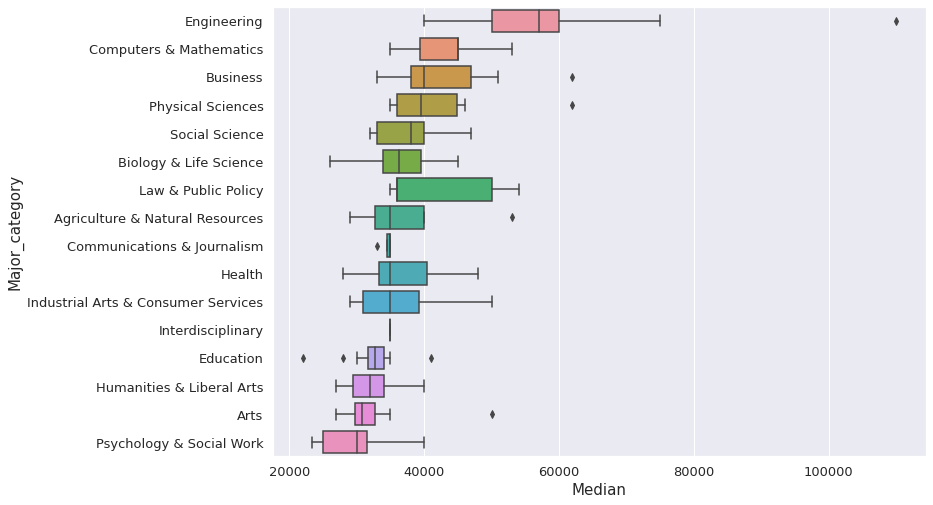

In [62]:
ax = sns.boxplot(
    data=df.rename(columns={MEDIAN: MEDIAN}).melt(
        id_vars=MAJOR_CATEGORY,
        value_vars=MEDIAN,
        value_name=MEDIAN,
    ),
    y=MAJOR_CATEGORY,
    x=MEDIAN,
    order=major_category_by_median_earning.index.to_list(),
)
# var = ax.set_xticklabels(ax.get_xticklabels(), rotation=35, horizontalalignment="right")

#### Relation entre la part de femmes et le revenu médian

##### Diagrammes en boîtes de la part des femmes triés par valeur médiane des revenus médians décroissante

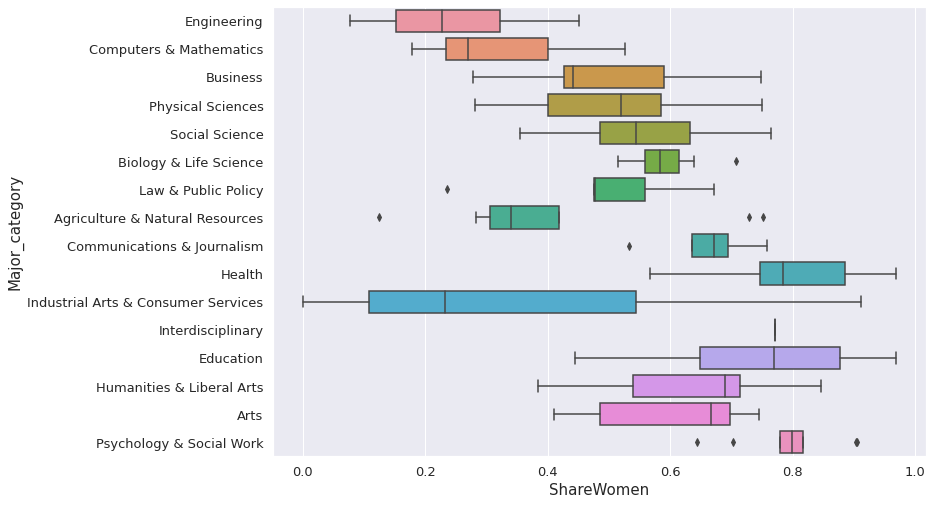

In [63]:
ax = sns.boxplot(
    data=df.rename(columns={SHAREWOMEN: SHAREWOMEN}).melt(
        id_vars=MAJOR_CATEGORY, value_vars=SHAREWOMEN, value_name=SHAREWOMEN
    ),
    y=MAJOR_CATEGORY,
    x=SHAREWOMEN,
    order=major_category_by_median_earning.index.to_list(),
)
# var = ax.set_xticklabels(ax.get_xticklabels(), rotation=35, horizontalalignment="right")

In [64]:
df.loc[df[MAJOR_CATEGORY] == "Engineering", SHAREWOMEN].describe()

count   29.00
mean     0.24
std      0.10
min      0.08
25%      0.15
50%      0.23
75%      0.32
max      0.45
Name: ShareWomen, dtype: float64

In [65]:
df.loc[df[MAJOR_CATEGORY] == "Education", SHAREWOMEN].describe()

count   16.00
mean     0.75
std      0.15
min      0.44
25%      0.65
50%      0.77
75%      0.88
max      0.97
Name: ShareWomen, dtype: float64

> En représentant la distribution de la part de femmes parmi les catégories triées par valeur médiane des revenus médians décroissante, on observe une différence prononcée de la part de femmes entre les catégories qui gagnent en médiane le plus, et celle qui gagnent le moins. L'ingénierie a une faible part de femmes, entre 7% et 45%, tandis que l'éducation a une part de femme comprise entre 44% et 96%.

In [66]:
sm.OLS()

TypeError: __init__() missing 1 required positional argument: 'endog'

##### Part de femmes expliquée par le revenu annuel médian

                            OLS Regression Results                            
Dep. Variable:             ShareWomen   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     105.4
Date:                Sat, 05 Jun 2021   Prob (F-statistic):           1.51e-19
Time:                        23:56:29   Log-Likelihood:                 49.827
No. Observations:                 172   AIC:                            -95.65
Df Residuals:                     170   BIC:                            -89.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0224      0.051     20.184      0.0

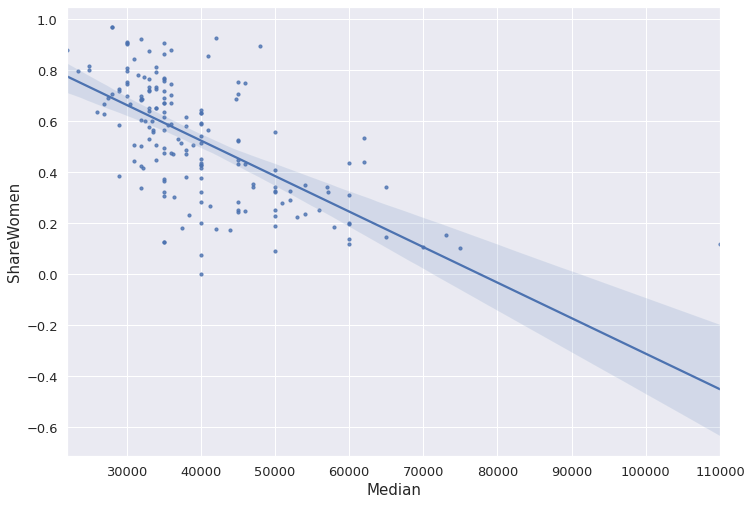

In [ ]:
lin_reg_model = sm.OLS(df[[SHAREWOMEN]], sm.add_constant(df[[MEDIAN]]), missing="drop")
lin_reg_res = lin_reg_model.fit()
print(lin_reg_res.summary())

# Seaborn
g = sns.regplot(data=df, x=MEDIAN, y=SHAREWOMEN, robust=True, scatter_kws={"s": 10})

In [ ]:
stats.normaltest(df[MEDIAN])

NormaltestResult(statistic=94.18713030991938, pvalue=3.527967047825003e-21)

In [ ]:
stats.normaltest(df[SHAREWOMEN], nan_policy="omit")

NormaltestResult(statistic=21.198515537750172, pvalue=2.493451003433553e-05)

In [ ]:
df.sort_values(MEDIAN, ascending=False).head(1)

Rank  Major_code                  Major    Total      Men  Women  \
0     1        2419  PETROLEUM ENGINEERING 2,339.00 2,057.00 282.00   

  Major_category  ShareWomen  Sample_size  Employed  ...  Part_time  \
0    Engineering        0.12           36      1976  ...        270   

   Full_time_year_round  Unemployed  Unemployment_rate     Median     P25th  \
0                  1207          37               0.02 110,000.00 95,000.00   

       P75th  College_jobs  Non_college_jobs  Low_wage_jobs  
0 125,000.00          1534               364            193  

[1 rows x 21 columns]

> La distribution des revenus médians n'est pas normale, et il y a de fortes valeurs extrêmes (*Petroleum Engineering*). Pour qualifier la relation qui lie la part de femmes au revenu médian, on calcule la corrélation de Spearman. Ce coefficient a l'avantage d'être moins sensible aux valeurs extrêmes.

In [ ]:
stats.spearmanr(df[[MEDIAN, SHAREWOMEN]], nan_policy="omit")

SpearmanrResult(correlation=-0.6557227364730451, pvalue=1.6490233496029415e-22)

> En établissant un modèle de régression linéaire ordinaire entre le revenu médian, et la part de femme de la spécialisation, une relation linéaire négative est observée. Plus le revenu médian est élevé, plus la part de femmes est haute. Cette relation est confirmée par une corrélation négative forte, qui traduit une relation de nature inversement proportionnelle entre la part de femmes et le revenu médian.

##### (Ne pas utiliser cette analyse) Part de femmes expliquée par le rang d'une spécialisation (plus le rang est bas, plus le revenu annuel médian est élevé)

                            OLS Regression Results                            
Dep. Variable:             ShareWomen   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     120.3
Date:                Sat, 05 Jun 2021   Prob (F-statistic):           1.65e-21
Time:                        23:56:55   Log-Likelihood:                 54.358
No. Observations:                 172   AIC:                            -104.7
Df Residuals:                     170   BIC:                            -98.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2620      0.027      9.595      0.0

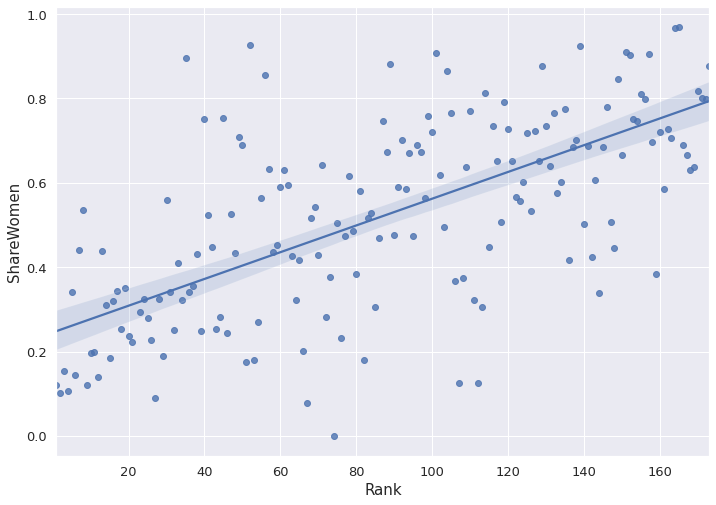

In [ ]:
lin_reg_model = sm.OLS(df[[SHAREWOMEN]], sm.add_constant(df[[RANK]]), missing="drop")
lin_reg_res = lin_reg_model.fit()
print(lin_reg_res.summary())

# Seaborn
g = sns.regplot(
    data=df,
    x=RANK,
    y=SHAREWOMEN,
    robust=True,
)

In [ ]:
stats.normaltest(df[RANK], nan_policy="omit")

NormaltestResult(statistic=76.13150090069117, pvalue=2.9393725216259145e-17)

In [ ]:
stats.normaltest(df[SHAREWOMEN], nan_policy="omit")

NormaltestResult(statistic=21.198515537750172, pvalue=2.493451003433553e-05)

In [ ]:
stats.spearmanr(df[[RANK, SHAREWOMEN]], nan_policy="omit")

SpearmanrResult(correlation=0.6466087924475795, pvalue=9.636363382169942e-22)

> En établissant un modèle de régression linéaire ordinaire entre le rang, et la part de femme de la spécialisation, une relation linéaire positive est observée. Plus le rang est élevé, plus la part de femmes est haute. Travailler avec les rangs directement mène forcément à une perte d'information. On applique le même raisonnement pour expliquer la part de femmes par le revenu médian.

> On observe également une corrélation positive forte entre les deux variables.

#### Relation entre l'écart inter-quartile et le revenu annuel médian

##### Diagrammes en boîtes des écarts interquartiles triés par revenu annuel médian

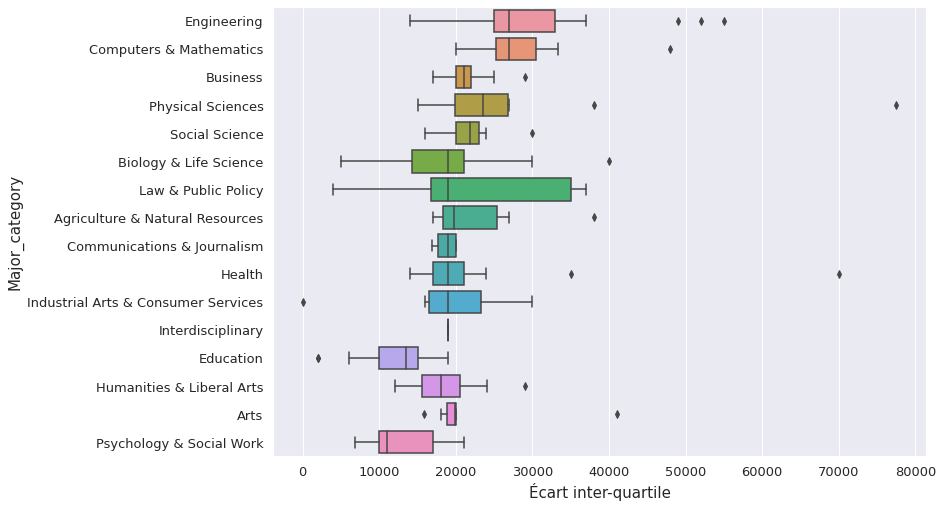

In [ ]:
ax = sns.boxplot(
    data=pd.DataFrame((df[P75TH] - df[P25TH]), columns=["Écart inter-quartile"])
    .set_index(df[MAJOR_CATEGORY])
    .reset_index(),
    y=MAJOR_CATEGORY,
    x="Écart inter-quartile",
    order=major_category_by_median_earning.index.tolist(),
    # showfliers=False
)
# var = ax.set_xticklabels(ax.get_xticklabels(), rotation=40, horizontalalignment="right")

##### L'écart interquartile expliquée par le revenu annuel médian

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     61.13
Date:                Sat, 05 Jun 2021   Prob (F-statistic):           5.23e-13
Time:                        23:57:18   Log-Likelihood:                -1816.6
No. Observations:                 173   AIC:                             3637.
Df Residuals:                     171   BIC:                             3643.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3541.1175   2453.793      1.443      0.1

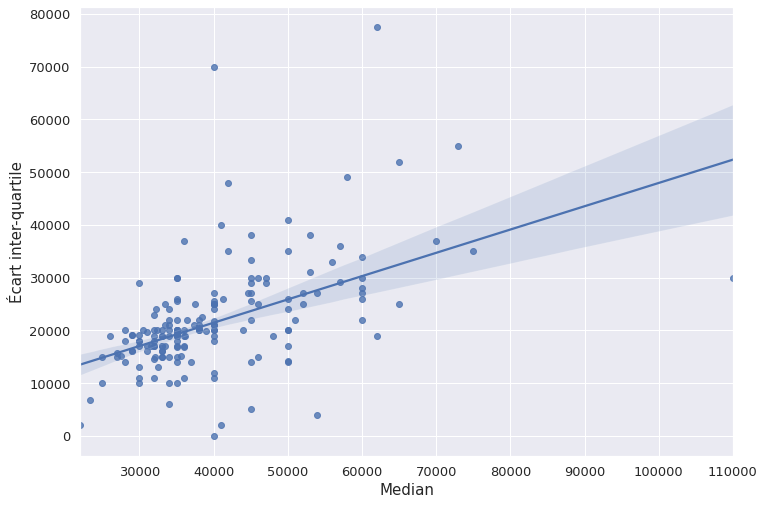

In [ ]:
lin_reg_model = sm.OLS(
    pd.DataFrame((df[P75TH] - df[P25TH])), sm.add_constant(df[[MEDIAN]]), missing="drop"
)
lin_reg_res = lin_reg_model.fit()
print(lin_reg_res.summary())

# Seaborn
g = sns.regplot(
    data=pd.DataFrame((df[P75TH] - df[P25TH]), columns=["Écart inter-quartile"])
    .set_index(df[MEDIAN])
    .reset_index(),
    x=MEDIAN,
    y="Écart inter-quartile",
    robust=True,
    truncate=True,
)

In [ ]:
stats.normaltest(df[MEDIAN], nan_policy="omit")

NormaltestResult(statistic=94.18713030991938, pvalue=3.527967047825003e-21)

In [ ]:
stats.normaltest(df[P75TH] - df[P25TH], nan_policy="omit")

NormaltestResult(statistic=91.13632710352412, pvalue=1.6218026996351774e-20)

In [ ]:
stats.spearmanr(
    pd.concat([df[P75TH] - df[P25TH], df[MEDIAN]], axis=1), nan_policy="omit"
)

SpearmanrResult(correlation=0.5825644378899052, pvalue=4.173522347362102e-17)

> En établissant un modèle de régression linéaire ordinaire entre l'écart inter-quartile, et le revenu médian de la spécialisation, une relation linéaire positive est observée. Plus le revenu médian est élevé, plus l'écart inter-quartile est grand.

> On observe également une corrélation positive forte entre les deux variables.

### Débouchées

#### Diagrammes en boîtes du taux de chômage trié par revenu annuel médian

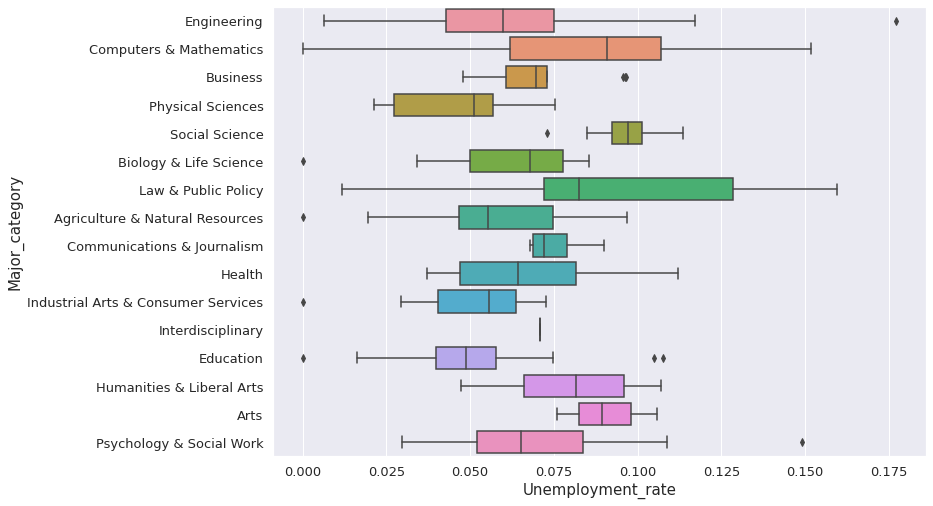

In [ ]:
ax = sns.boxplot(
    data=df.rename(columns={UNEMPLOYMENT_RATE: UNEMPLOYMENT_RATE}).melt(
        id_vars=MAJOR_CATEGORY,
        value_vars=UNEMPLOYMENT_RATE,
        value_name=UNEMPLOYMENT_RATE,
    ),
    y=MAJOR_CATEGORY,
    x=UNEMPLOYMENT_RATE,
    order=major_category_by_median_earning.index.tolist(),
)
# var = ax.set_xticklabels(ax.get_xticklabels(), rotation=40, horizontalalignment="right")

## Median earnings

In [ ]:
df[[SAMPLE_SIZE, MEDIAN, P25TH, P75TH]].describe()

Sample_size     Median     P25th      P75th
count       173.00     173.00    173.00     173.00
mean        356.08  40,151.45 29,501.45  51,494.22
std         618.36  11,470.18  9,166.01  14,906.28
min           2.00  22,000.00 18,500.00  22,000.00
25%          39.00  33,000.00 24,000.00  42,000.00
50%         130.00  36,000.00 27,000.00  47,000.00
75%         338.00  45,000.00 33,000.00  60,000.00
max       4,212.00 110,000.00 95,000.00 125,000.00

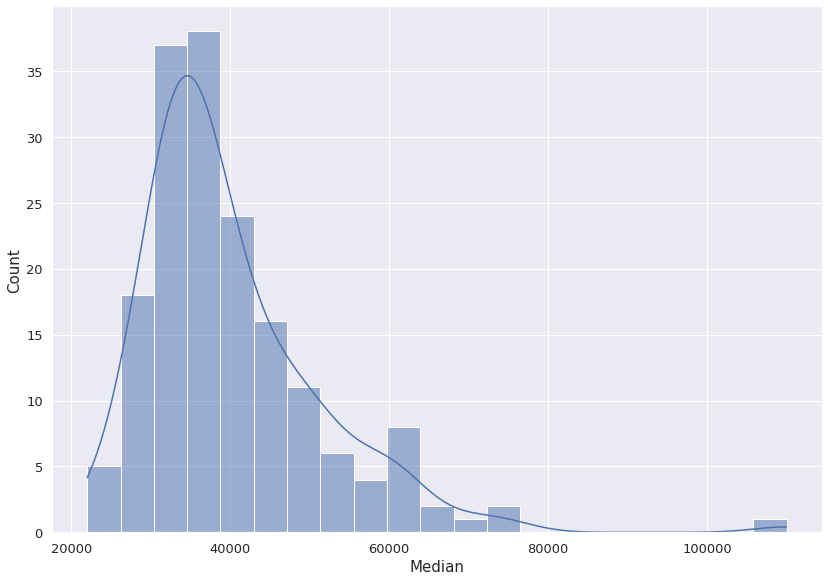

In [129]:
g = sns.histplot(df[MEDIAN], kde=True)
g.figure.tight_layout()
g.figure.savefig("../rapport/figures/histplot_median.pdf", dpi=300)

In [125]:
stats.shapiro(df[MEDIAN])

ShapiroResult(statistic=0.8456408381462097, pvalue=3.0635674119067202e-12)

In [125]:
stats.shapiro(df[P25TH])

ShapiroResult(statistic=0.8456408381462097, pvalue=3.0635674119067202e-12)

In [126]:
stats.shapiro(df[P75TH])

ShapiroResult(statistic=0.8513702154159546, pvalue=5.595903948552028e-12)

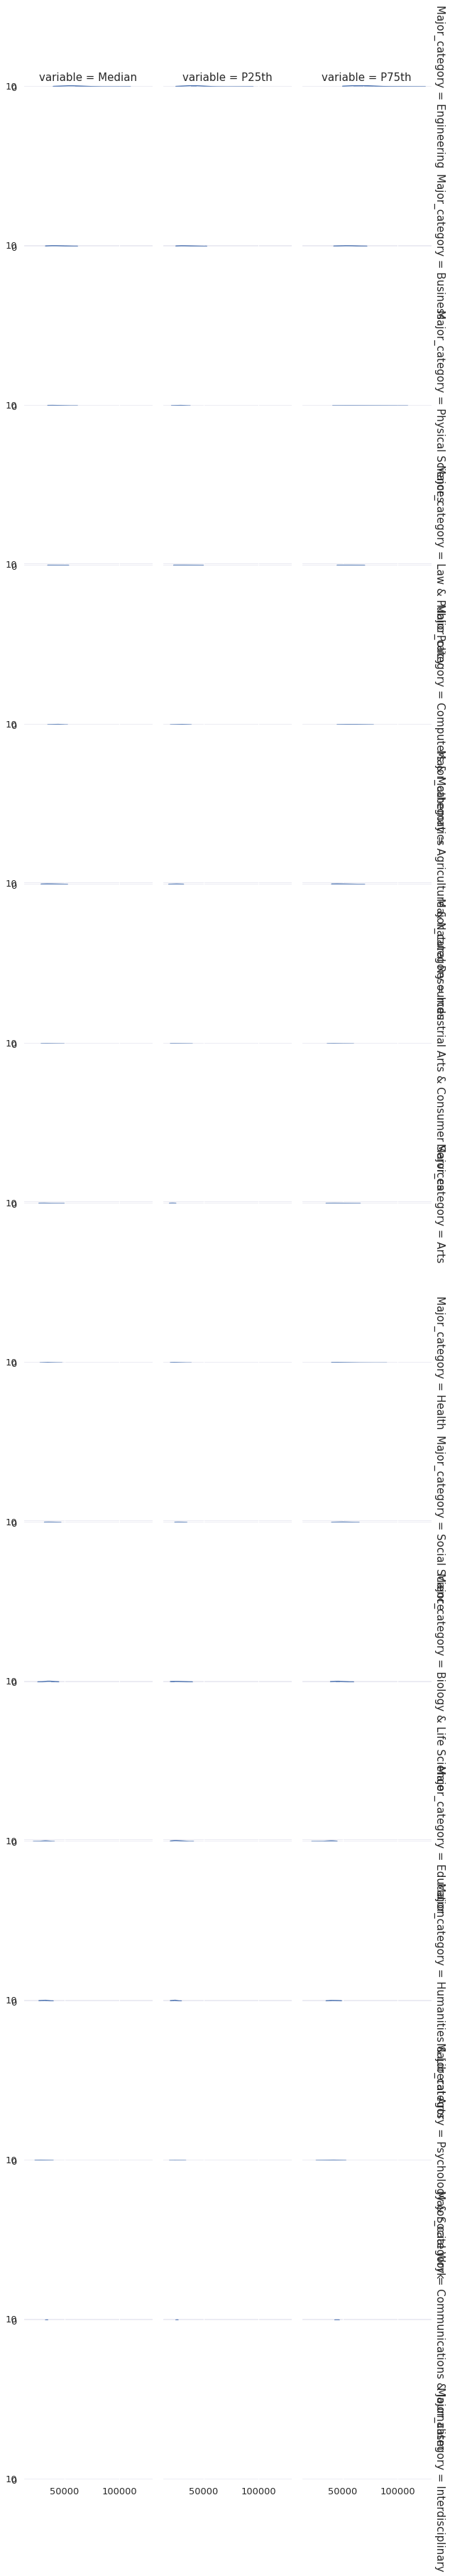

In [ ]:
g = sns.FacetGrid(
    data=df.melt(id_vars=[RANK, MAJOR_CATEGORY], value_vars=[MEDIAN, P25TH, P75TH]),
    col="variable",
    row=MAJOR_CATEGORY,
    margin_titles=True,
)
g.map_dataframe(sns.histplot, x="value", kde=True)

## Dataset anomalies

### [Reconstructed Original source code](https://github.com/fivethirtyeight/data/blob/master/college-majors/college-majors-rscript.R)
```R
# COLLEGE MAJORS AND EARNINGS
# This is the code used to generate data for FiveThirtyEight's
# story on earnings by college major.
# Analysis is based off the 2010-2012 American Community Survey
# microdata. 
# Download data here: http://www.census.gov/acs/www/data_documentation/pums_data/
# Documentation here: http://www.census.gov/acs/www/data_documentation/pums_documentation/
--------------------------------------------------------------------------
# First download data and select records for which college major 
# (variable FOD1P) is present. Save into data frame as MAJORS1012.
# Also download github_majorslist.csv
require(dplyr)

load("MAJORS1012")
MajorsList <- read.csv("github_majorslist.csv",header=TRUE,stringsAsFactors=FALSE)

working <- merge(MAJORS1012,MajorsList,by="FOD1P") # Check merge properly
MAJORS1012  <- working
rm(working)

# Create dummy for full-time, year-round workers
MAJORS1012$FTYR <- 0
MAJORS1012$FTYR[MAJORS1012$WKW == 1 & MAJORS1012$WKHP >= 35] <- 1
nrow(MAJORS1012[MAJORS1012$FTYR==1,])


# For YOUNG (up to 27):
#   - Number: Total, Employed, Unemployed, Employed FTYR
#   - Sample size
#   - Median earnings (for FYFT)
#   - 25% and 75% percentile earnings
#   - Unemployment rate
#   - Median hours worked
#   - Share working full-time
#   - Share employed in college/noncollege and low-end jobs
# Several smaller data frames
young <- filter(MAJORS1012,AGEP < 28) # This DOES include students with grad degrees
young.ftyr <- filter(young,FTYR == 1 & SCHL == 21 & SCH == 1) # But this doesn't. Also excludes those in school.

lowend <- c(4020,4030,4040,4050,4060,4110,4120,4130,4140,4150,4220,4230,4240,4250,4720,4740,4750,4760,4940)
young$LowEnd  <-  0
young$LowEnd[young$OCCP10 %in% as.list(lowend) | young$OCCP12 %in% as.list(lowend)] <- 1

# This creates a dummy for college-level jobs. Based off non-public data from Jaison R. Abel and
# Richard Deitz of the New York Fed. As a result, csv is not included here.
collegejobs <- read.csv("collegejobs.csv",header=TRUE,stringsAsFactors=FALSE)
young$collegejob[young$OCCP10 %in% as.list(collegejobs$OCC[collegejobs$College==1]) | 
                   young$OCCP12 %in% as.list(collegejobs$OCC[collegejobs$College==1])]  <- 1
young$noncollege[young$OCCP10 %in% as.list(collegejobs$OCC[collegejobs$College==0]) | 
                   young$OCCP12 %in% as.list(collegejobs$OCC[collegejobs$College==0])]  <- 1

Young <- data.frame(FOD1P = as.numeric(MajorsList$FOD1P[2:nrow(MajorsList)]),Major = MajorsList$Major[2:nrow(MajorsList)],Major_Cat = MajorsList$Major_Category[2:nrow(MajorsList)],
                    Total = NA, Employed = NA, FTYR = NA, Unemployed = NA, Urate = NA, Median = NA, P25th = NA, P75th = NA, Sample = NA,
                    Median_hours = NA, FT = NA, PT = NA, LowEnd = NA, CollegeJob = NA, NonCollege = NA, Men = NA, Women = NA, ShareWomen = NA)

loop <- seq(1:nrow(AllAges))
for (i in loop) {
    x <- Young$FOD1P[i]
    Young[i,4] <- with(young,sum(PWGTP[FOD1P==x]))
    Young[i,5] <- with(young,sum(PWGTP[FOD1P==x & (ESR == 1 | ESR == 2)]))
    Young[i,6] <- with(young,sum(PWGTP[FOD1P==x & FTYR == 1]))
    Young[i,7] <- with(young,sum(PWGTP[FOD1P==x & ESR == 3]))
    Young[i,8] <- Young[i,7]/(Young[i,5] + Young[i,7])
    Young[i,9] <- with(young.ftyr[young.ftyr$FOD1P == x & young.ftyr$PERNP>0,],median(rep(PERNP,times=PWGTP)))
    Young[i,10] <- with(young.ftyr[young.ftyr$FOD1P == x & young.ftyr$PERNP>0,],quantile(rep(PERNP,times=PWGTP))[2])
    Young[i,11] <- with(young.ftyr[young.ftyr$FOD1P == x & young.ftyr$PERNP>0,],quantile(rep(PERNP,times=PWGTP))[4])
    Young[i,12] <- nrow(young.ftyr[young.ftyr$FOD1P == x & young.ftyr$PERNP>0,])
    Young[i,13] <- with(young[young$FOD1P == x,],median(na.omit(rep(WKHP,times=PWGTP))))
    Young[i,14] <- with(young,sum(na.omit(PWGTP[FOD1P==x & WKHP >= 35])))
    Young[i,15] <- with(young,sum(na.omit(PWGTP[FOD1P==x & WKHP < 35])))
    Young[i,16] <- with(young,sum(PWGTP[FOD1P==x & LowEnd == 1]))
    Young[i,17] <- with(young,sum(na.omit(PWGTP[FOD1P==x & collegejob == 1 & (ESR == 1 | ESR == 2)]))) # only want employed
    Young[i,18] <- with(young,sum(na.omit(PWGTP[FOD1P==x & noncollege == 1 & (ESR == 1 | ESR == 2)]))) # only want employed
    Young[i,19] <- with(young,sum(PWGTP[FOD1P==x & SEX == 1]))
    Young[i,20] <- with(young,sum(PWGTP[FOD1P==x & SEX == 2]))
    Young[i,21] <- Young[i,20]/(Young[i,19] + Young[i,20])
}

write.csv(Young,file="Young.csv")
```
### Employed, Unemployed

In [ ]:
f"{df.Total.sum():,}"

'6,771,654.0'

In [ ]:
f"{df[EMPLOYED].sum() + df[UNEMPLOYED].sum():,}"

'5,814,373'

```R
Young[i,5] <- with(young,sum(PWGTP[FOD1P==x & (ESR == 1 | ESR == 2)]))
Young[i,7] <- with(young,sum(PWGTP[FOD1P==x & ESR == 3]))
```
Un filtre sur *ESR* s'applique, les catégories manquantes correspondent à la différence.

### Full-time, Part-time

In [ ]:
f"{df[EMPLOYED].sum():,}"

'5,396,348'

In [ ]:
f"{df[FULL_TIME].sum() + df[PART_TIME].sum():,}"

'6,031,075'

```R
Young[i,14] <- with(young,sum(na.omit(PWGTP[FOD1P==x & WKHP >= 35])))
Young[i,15] <- with(young,sum(na.omit(PWGTP[FOD1P==x & WKHP < 35])))
```
Le filtre *ESR == 1* ou *ESR == 2* ne s'applique pas.

### Non-college jobs, college jobs

In [ ]:
f"{df[EMPLOYED].sum():,}"

'5,396,348'

In [ ]:
f"{df[COLLEGE_JOBS].sum() + df[NON_COLLEGE_JOBS].sum():,}"

'4,430,034'

<AxesSubplot:>

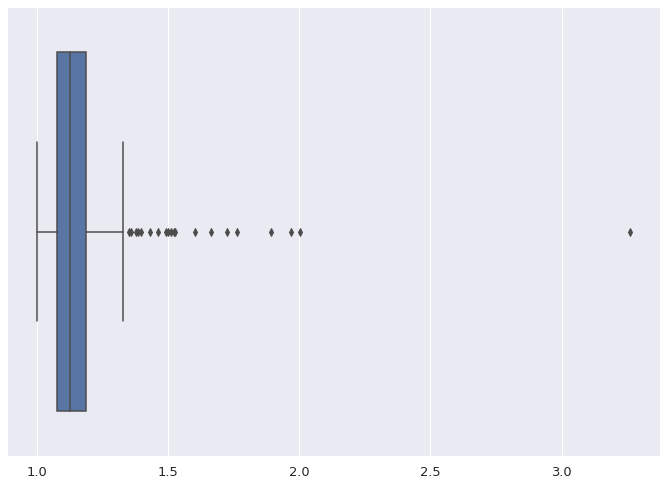

In [ ]:
sns.boxplot(df[EMPLOYED] / (df[COLLEGE_JOBS] + df[NON_COLLEGE_JOBS]))

```R
young$collegejob[young$OCCP10 %in% as.list(collegejobs$OCC[collegejobs$College==1]) | 
                   young$OCCP12 %in% as.list(collegejobs$OCC[collegejobs$College==1])]  <- 1
young$noncollege[young$OCCP10 %in% as.list(collegejobs$OCC[collegejobs$College==0]) | 
                   young$OCCP12 %in% as.list(collegejobs$OCC[collegejobs$College==0])]  <- 1
Young[i,17] <- with(young,sum(na.omit(PWGTP[FOD1P==x & collegejob == 1 & (ESR == 1 | ESR == 2)]))) # only want employed
Young[i,18] <- with(young,sum(na.omit(PWGTP[FOD1P==x & noncollege == 1 & (ESR == 1 | ESR == 2)]))) # only want employed
```

Parmi les individus avec un emploi, le filtre sur l'exigence d'un diplôme universitare ne s'applique uniquement parmi une liste choisie de métiers. Comme le nombre d'individus employés comprend tous les métiers possibles, et est supérieur à la somme des individus diplôme universitaire exigé ou non, on en déduit que la liste utilisée des métiers n'est pas complète. Dans le cas contraire, comme précisé dans le code source, supposant que *\$NON_COLLEGE_JOBS* étant le complémentaire de *\$COLLEGE_JOBS*, les deux quantités auraient été égales. Plus improbable, la variable *\$College* dans la liste des métiers est peut-être codée dans un espace non binaire, par exemple diplômé université exigé, non exigé, ou indifférent.

### Low-wage jobs

In [ ]:
f"{df[EMPLOYED].sum():,}"

'5,396,348'

In [ ]:
f"{df[COLLEGE_JOBS].sum() + df[NON_COLLEGE_JOBS].sum() + df[LOW_WAGE_JOBS].sum():,}"

'5,097,644'

```R
Young[i,16] <- with(young,sum(PWGTP[FOD1P==x & LowEnd == 1]))
```

Il n'est pas possible de savoir si la liste des métiers peu rémunérés est disjointe des métiers qui exigent/n'exigent pas un diplôme universitaire. Par ailleurs, la somme des individus diplôme université exigé ou non et à emploi peu rémunéré est inférieure à la somme des individus avec un emploi, ce qui laisse également à penser que l'ensemble des métiers n'est pas complet malgré l'addition des métiers peu rémunéré.

# References
- Corrélation : https://doi.org/10.1177/8756479308317006
- ACS : https://www.census.gov/programs-surveys/acs/about/acs-and-census.html
- PUMS : https://www.census.gov/programs-surveys/acs/microdata.html
- Article : https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/#fn-4
- Original github : https://github.com/fivethirtyeight/data/tree/master/college-majors
